<center><font size=6.5>                 Project: NLP-ReneWind</font></center>


# Problem Statement

## Business Context

Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of
energy production increases.

Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide. The U.S. Department of
Energy has put together a guide to achieving operational efficiency using predictive maintenance practices.

Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and future component
capability. The idea behind predictive maintenance is that failure patterns are predictable and if component failure can be predicted
accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.

The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental
factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower,
blades, break, etc.).

## Objective

"ReneWind" is a company working on improving the machinery/processes involved in the production of wind energy using machine learning
and has collected data on generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data
collected through sensors is confidential (the type of data collected varies with companies). Data has 40 predictors, 20000 observations in
the training set, and 5000 in the test set.

The objective is to build various classification models, tune them, and find the best one that will help identify failures so that the generators
can be repaired before failing/breaking to reduce the overall maintenance cost.
The nature of predictions made by the classification model will translate as follows:

 - True positives (TP) are failures correctly predicted by the model. These will result in repair costs.
 - False negatives (FN) are real failures where there is no detection by the model. These will result in replacement costs.
 - False positives (FP) are detections where there is no failure. These will result in inspection costs.

It is given that the cost of repairing a generator is much less than the cost of replacing it, and the cost of inspection is less than the cost of
repair.

"1" in the target variable should be considered as "failure" and "0" represents "No failure".

## Data Dictionary

# **Importing the necessary libraries**

In [ ]:
#Installing the libraries with the specified version.
!pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.23.5 pandas==1.5.3 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 61.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 58.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 41.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 56.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 41.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 40.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 76.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 4.9 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you pr

- We are using specific library versions to ensure compatibility, avoid unexpected issues, and maintain smooth execution of the code.

In [ ]:
# Numerical computing and data handling libraries
import numpy as np
import pandas as pd

# Data visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Warning control
import warnings
warnings.filterwarnings('ignore')

# Used as a random state throughout the dataset for reproducibility
RS = 42

# Module for time-related operations.
import time

# Scikit-learn modules for model training and evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

# TensorFlow and Keras for building deep learning models
import tensorflow as tf
from tensorflow import keras

# Utility from scikit-learn to compute class weights for handling imbalanced datasets
from sklearn.utils import class_weight

# Import L2 regularization to prevent overfitting by penalizing large weights
from keras.regularizers import l2

# Import EarlyStopping to stop training early if model performance stops improving
from keras.callbacks import EarlyStopping

# Keras backend utilities
from keras import backend

# Keras layers for constructing neural networks
from keras.layers import Dense, BatchNormalization, Dropout

# Keras model type for building models layer-by-layer
from keras.models import Sequential


In [ ]:
# Set seed for reproducibility across NumPy, Keras, and Python
keras.utils.set_random_seed(812)

# Enable deterministic GPU operations (may reduce performance)
tf.config.experimental.enable_op_determinism()


# **Loading the data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ReneWind=pd.read_csv("/content/drive/My Drive/GL Python Learning/NLP/NLP Project/Train.csv")

In [ ]:
data=ReneWind.copy()

- Use .copy() to avoid modifying the original dataset and prevent accidental data loss

# **Data Overview**

## Viewing the first and last 5 rows

In [ ]:
data.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -4.464606 -4.679129  3.101546  0.506130 -0.221083 -2.032511 -2.910870   
1  3.365912  3.653381  0.909671 -1.367528  0.332016  2.358938  0.732600   
2 -3.831843 -5.824444  0.634031 -2.418815 -1.773827  1.016824 -2.098941   
3  1.618098  1.888342  7.046143 -1.147285  0.083080 -1.529780  0.207309   
4 -0.111440  3.872488 -3.758361 -2.982897  3.792714  0.544960  0.205433   

         V8        V9       V10  ...       V32       V33        V34       V35  \
0  0.050714 -1.522351  3.761892  ...  3.059700 -1.690440   2.846296  2.235198   
1 -4.332135  0.565695 -0.101080  ... -1.795474  3.032780  -2.467514  1.894599   
2 -3.173204 -2.081860  5.392621  ... -0.257101  0.803550   4.086219  2.292138   
3 -2.493629  0.344926  2.118578  ... -3.584425 -2.577474   1.363769  0.622714   
4  4.848994 -1.854920 -6.220023  ...  8.265896  6.629213 -10.068689  1.222987   

        V36       V37       V38       V39       V40  Target  
0  6.667486  0.443809 -2.369169  2.950578 -3.480324       0  
1 -2.297780 -1.731048  5.908837 -0.386345  0.616242       0  
2  5.360850  0.351993  2.940021  3.839160 -4.309402       0  
3  5.550100 -1.526796  0.138853  3.101430 -1.277378       0  
4 -3.229763  1.686909 -2.163896 -3.644622  6.510338       0  

[5 rows x 41 columns]

In [ ]:
data.tail()

V1         V2        V3        V4        V5        V6        V7  \
19995 -2.071318  -1.088279 -0.796174 -3.011720 -2.287540  2.807310  0.481428   
19996  2.890264   2.483069  5.643919  0.937053 -1.380870  0.412051 -1.593386   
19997 -3.896979  -3.942407 -0.351364 -2.417462  1.107546 -1.527623 -3.519882   
19998 -3.187322 -10.051662  5.695955 -4.370053 -5.354758 -1.873044 -3.947210   
19999 -2.686903   1.961187  6.137088  2.600133  2.657241 -4.290882 -2.344267   

             V8        V9       V10  ...       V32       V33       V34  \
19995  0.105171 -0.586599 -2.899398  ... -8.273996  5.745013  0.589014   
19996 -5.762498  2.150096  0.272302  ... -4.159092  1.181466 -0.742412   
19997  2.054792 -0.233996 -0.357687  ...  7.112162  1.476080 -3.953710   
19998  0.679420 -2.389254  5.456756  ...  0.402812  3.163661  3.752095   
19999  0.974004 -1.027462  0.497421  ...  6.620811 -1.988786 -1.348901   

            V35       V36       V37       V38       V39       V40  Target  
19995 -0.649988 -3.043174  2.216461  0.608723  0.178193  2.927755       1  
19996  5.368979 -0.693028 -1.668971  3.659954  0.819863 -1.987265       0  
19997  1.855555  5.029209  2.082588 -6.409304  1.477138 -0.874148       0  
19998  8.529894  8.450626  0.203958 -7.129918  4.249394 -6.112267       0  
19999  3.951801  5.449706 -0.455411 -2.202056  1.678229 -1.974413       0  

[5 rows x 41 columns]

- The dataset contains negative values, which we assume are valid since it's sensor data.
- As feature and sensor names are not provided, we cannot verify which specific sensors produce negative readings.


## Shape,Info and satistical analysis over data

In [ ]:
data.shape
print(f'The dataset contains {data.shape[0]} rows and {data.shape[1]} columns.')

The dataset contains 20000 rows and 41 columns.


- The dataset has 41 columns: 40 independent features and 1 dependent target.
- We'll use the 40 features to build a model that predicts the target variable.


In [ ]:
data['Target'].nunique()

2

- As expected, the target column contains only two unique classes: 0 and 1.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      19982 non-null  float64
 1   V2      19982 non-null  float64
 2   V3      20000 non-null  float64
 3   V4      20000 non-null  float64
 4   V5      20000 non-null  float64
 5   V6      20000 non-null  float64
 6   V7      20000 non-null  float64
 7   V8      20000 non-null  float64
 8   V9      20000 non-null  float64
 9   V10     20000 non-null  float64
 10  V11     20000 non-null  float64
 11  V12     20000 non-null  float64
 12  V13     20000 non-null  float64
 13  V14     20000 non-null  float64
 14  V15     20000 non-null  float64
 15  V16     20000 non-null  float64
 16  V17     20000 non-null  float64
 17  V18     20000 non-null  float64
 18  V19     20000 non-null  float64
 19  V20     20000 non-null  float64
 20  V21     20000 non-null  float64
 21  V22     20000 non-null  float64
 22

- As expected, the sensor value columns (features) are mostly of type float.
- The target column contains only 0s and 1s, so it is of integer type.
- Except for columns V1 and V2, there are no missing values in the dataset.


In [ ]:
data.describe()

V1            V2            V3            V4            V5  \
count  19982.000000  19982.000000  20000.000000  20000.000000  20000.000000   
mean      -0.271996      0.440430      2.484699     -0.083152     -0.053752   
std        3.441625      3.150784      3.388963      3.431595      2.104801   
min      -11.876451    -12.319951    -10.708139    -15.082052     -8.603361   
25%       -2.737146     -1.640674      0.206860     -2.347660     -1.535607   
50%       -0.747917      0.471536      2.255786     -0.135241     -0.101952   
75%        1.840112      2.543967      4.566165      2.130615      1.340480   
max       15.493002     13.089269     17.090919     13.236381      8.133797   

                 V6            V7            V8            V9           V10  \
count  20000.000000  20000.000000  20000.000000  20000.000000  20000.000000   
mean      -0.995443     -0.879325     -0.548195     -0.016808     -0.012998   
std        2.040970      1.761626      3.295756      2.160568      2.193201   
min      -10.227147     -7.949681    -15.657561     -8.596313     -9.853957   
25%       -2.347238     -2.030926     -2.642665     -1.494973     -1.411212   
50%       -1.000515     -0.917179     -0.389085     -0.067597      0.100973   
75%        0.380330      0.223695      1.722965      1.409203      1.477045   
max        6.975847      8.006091     11.679495      8.137580      8.108472   

       ...           V32           V33           V34           V35  \
count  ...  20000.000000  20000.000000  20000.000000  20000.000000   
mean   ...      0.303799      0.049825     -0.462702      2.229620   
std    ...      5.500400      3.575285      3.183841      2.937102   
min    ...    -19.876502    -16.898353    -17.985094    -15.349803   
25%    ...     -3.420469     -2.242857     -2.136984      0.336191   
50%    ...      0.052073     -0.066249     -0.255008      2.098633   
75%    ...      3.761722      2.255134      1.436935      4.064358   
max    ...     23.633187     16.692486     14.358213     15.291065   

                V36           V37           V38           V39           V40  \
count  20000.000000  20000.000000  20000.000000  20000.000000  20000.000000   
mean       1.514809      0.011316     -0.344025      0.890653     -0.875630   
std        3.800860      1.788165      3.948147      1.753054      3.012155   
min      -14.833178     -5.478350    -17.375002     -6.438880    -11.023935   
25%       -0.943809     -1.255819     -2.987638     -0.272250     -2.940193   
50%        1.566526     -0.128435     -0.316849      0.919261     -0.920806   
75%        3.983939      1.175533      2.279399      2.057540      1.119897   
max       19.329576      7.467006     15.289923      7.759877     10.654265   

             Target  
count  20000.000000  
mean       0.055500  
std        0.228959  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000  

[8 rows x 41 columns]

- Most features have 20,000 values, but V1 and V2 have 18 missing values.

- Sensor features are continuous floats; the target is binary (0 or 1).

- Many features have negative minimum values, which is typical for sensor data.

- Feature values vary widely in scale across different columns.

- The target variable is highly imbalanced, with most values being 0.

# **Exploratory Data Analysis**

## **Univariate Analysis**

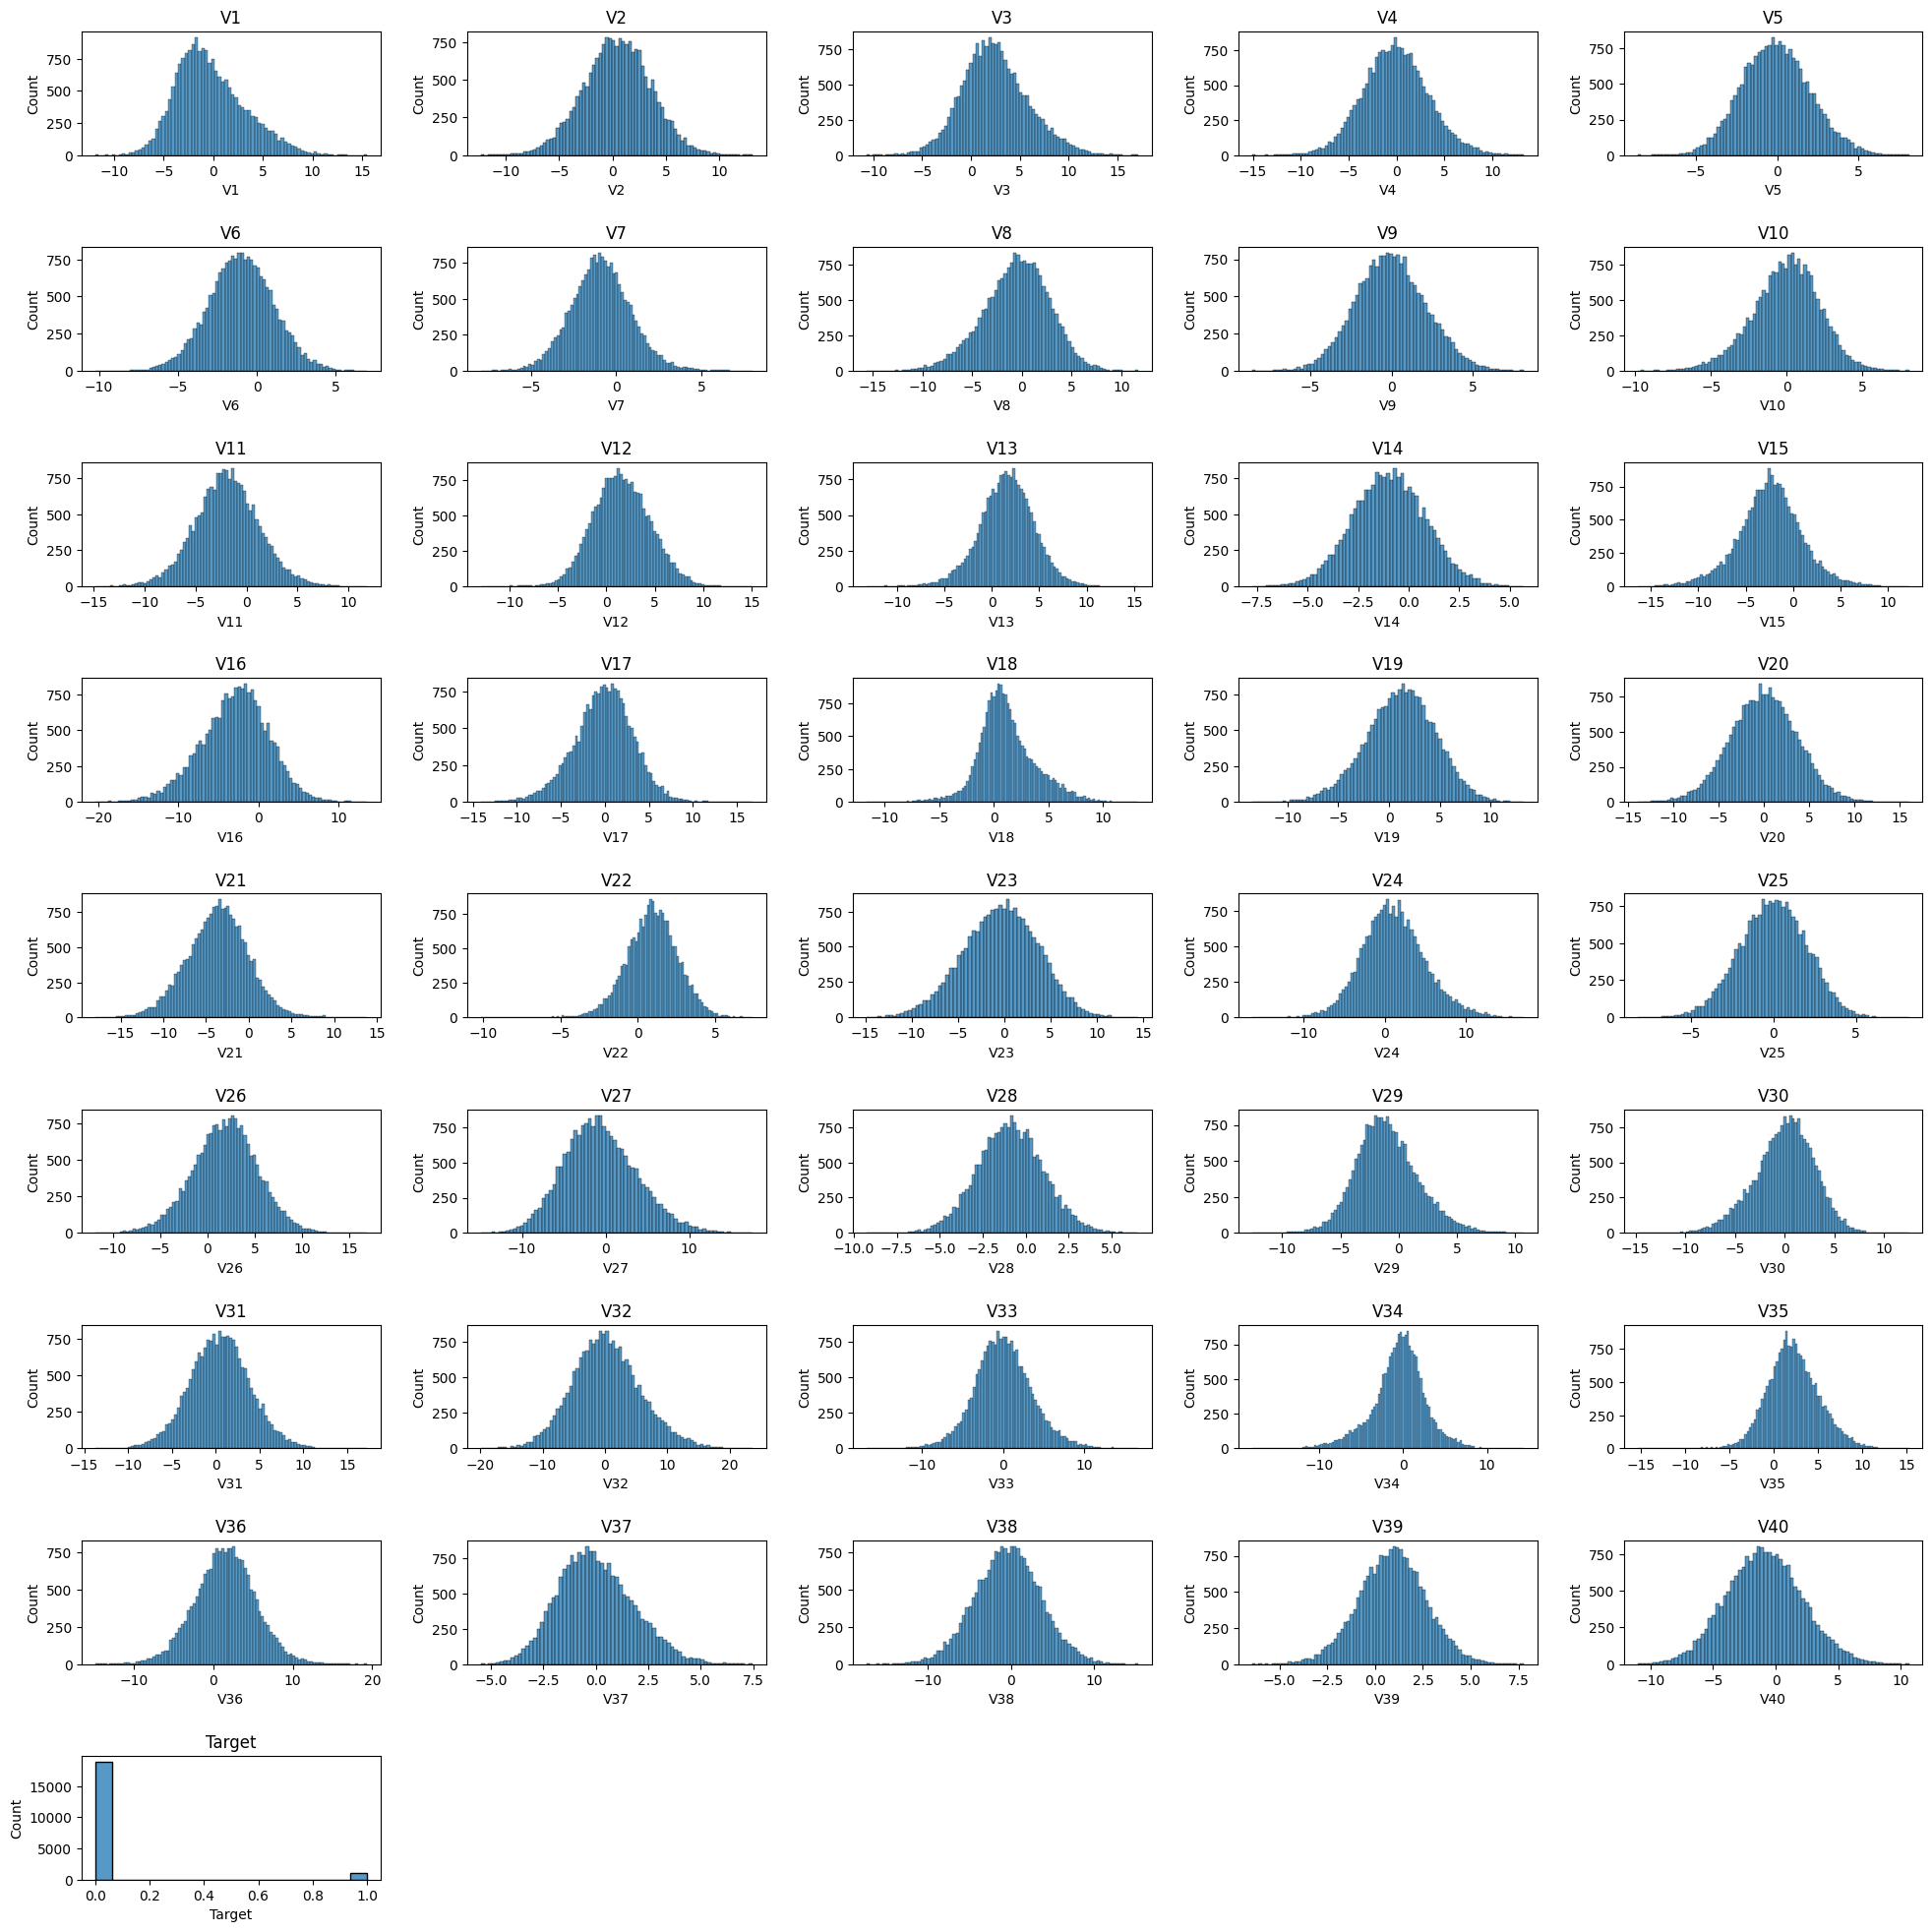

In [ ]:
col_list=data.columns.to_list()
plt.figure(figsize=(20,20))
for i,col in enumerate(col_list):
  plt.subplot(9,5,i+1)
  sns.histplot(data=data,x=col)
  plt.title(col)
  plt.tight_layout(pad=2)
plt.show()

- Most of the features look like they follow a normal (bell-shaped) pattern, with values mostly around 0.

- Some features (e.g., V2, V5, V8) show slight skewness, which may indicate outliers or asymmetrical sensor behavior.

- The amount of spread (difference in values) is not the same for all features.

- The data looks smooth and complete, with no strange gaps or flat lines.

- The target variable is highly imbalanced, with class 0 (no failure) occurring much more frequently than class 1 (failure).

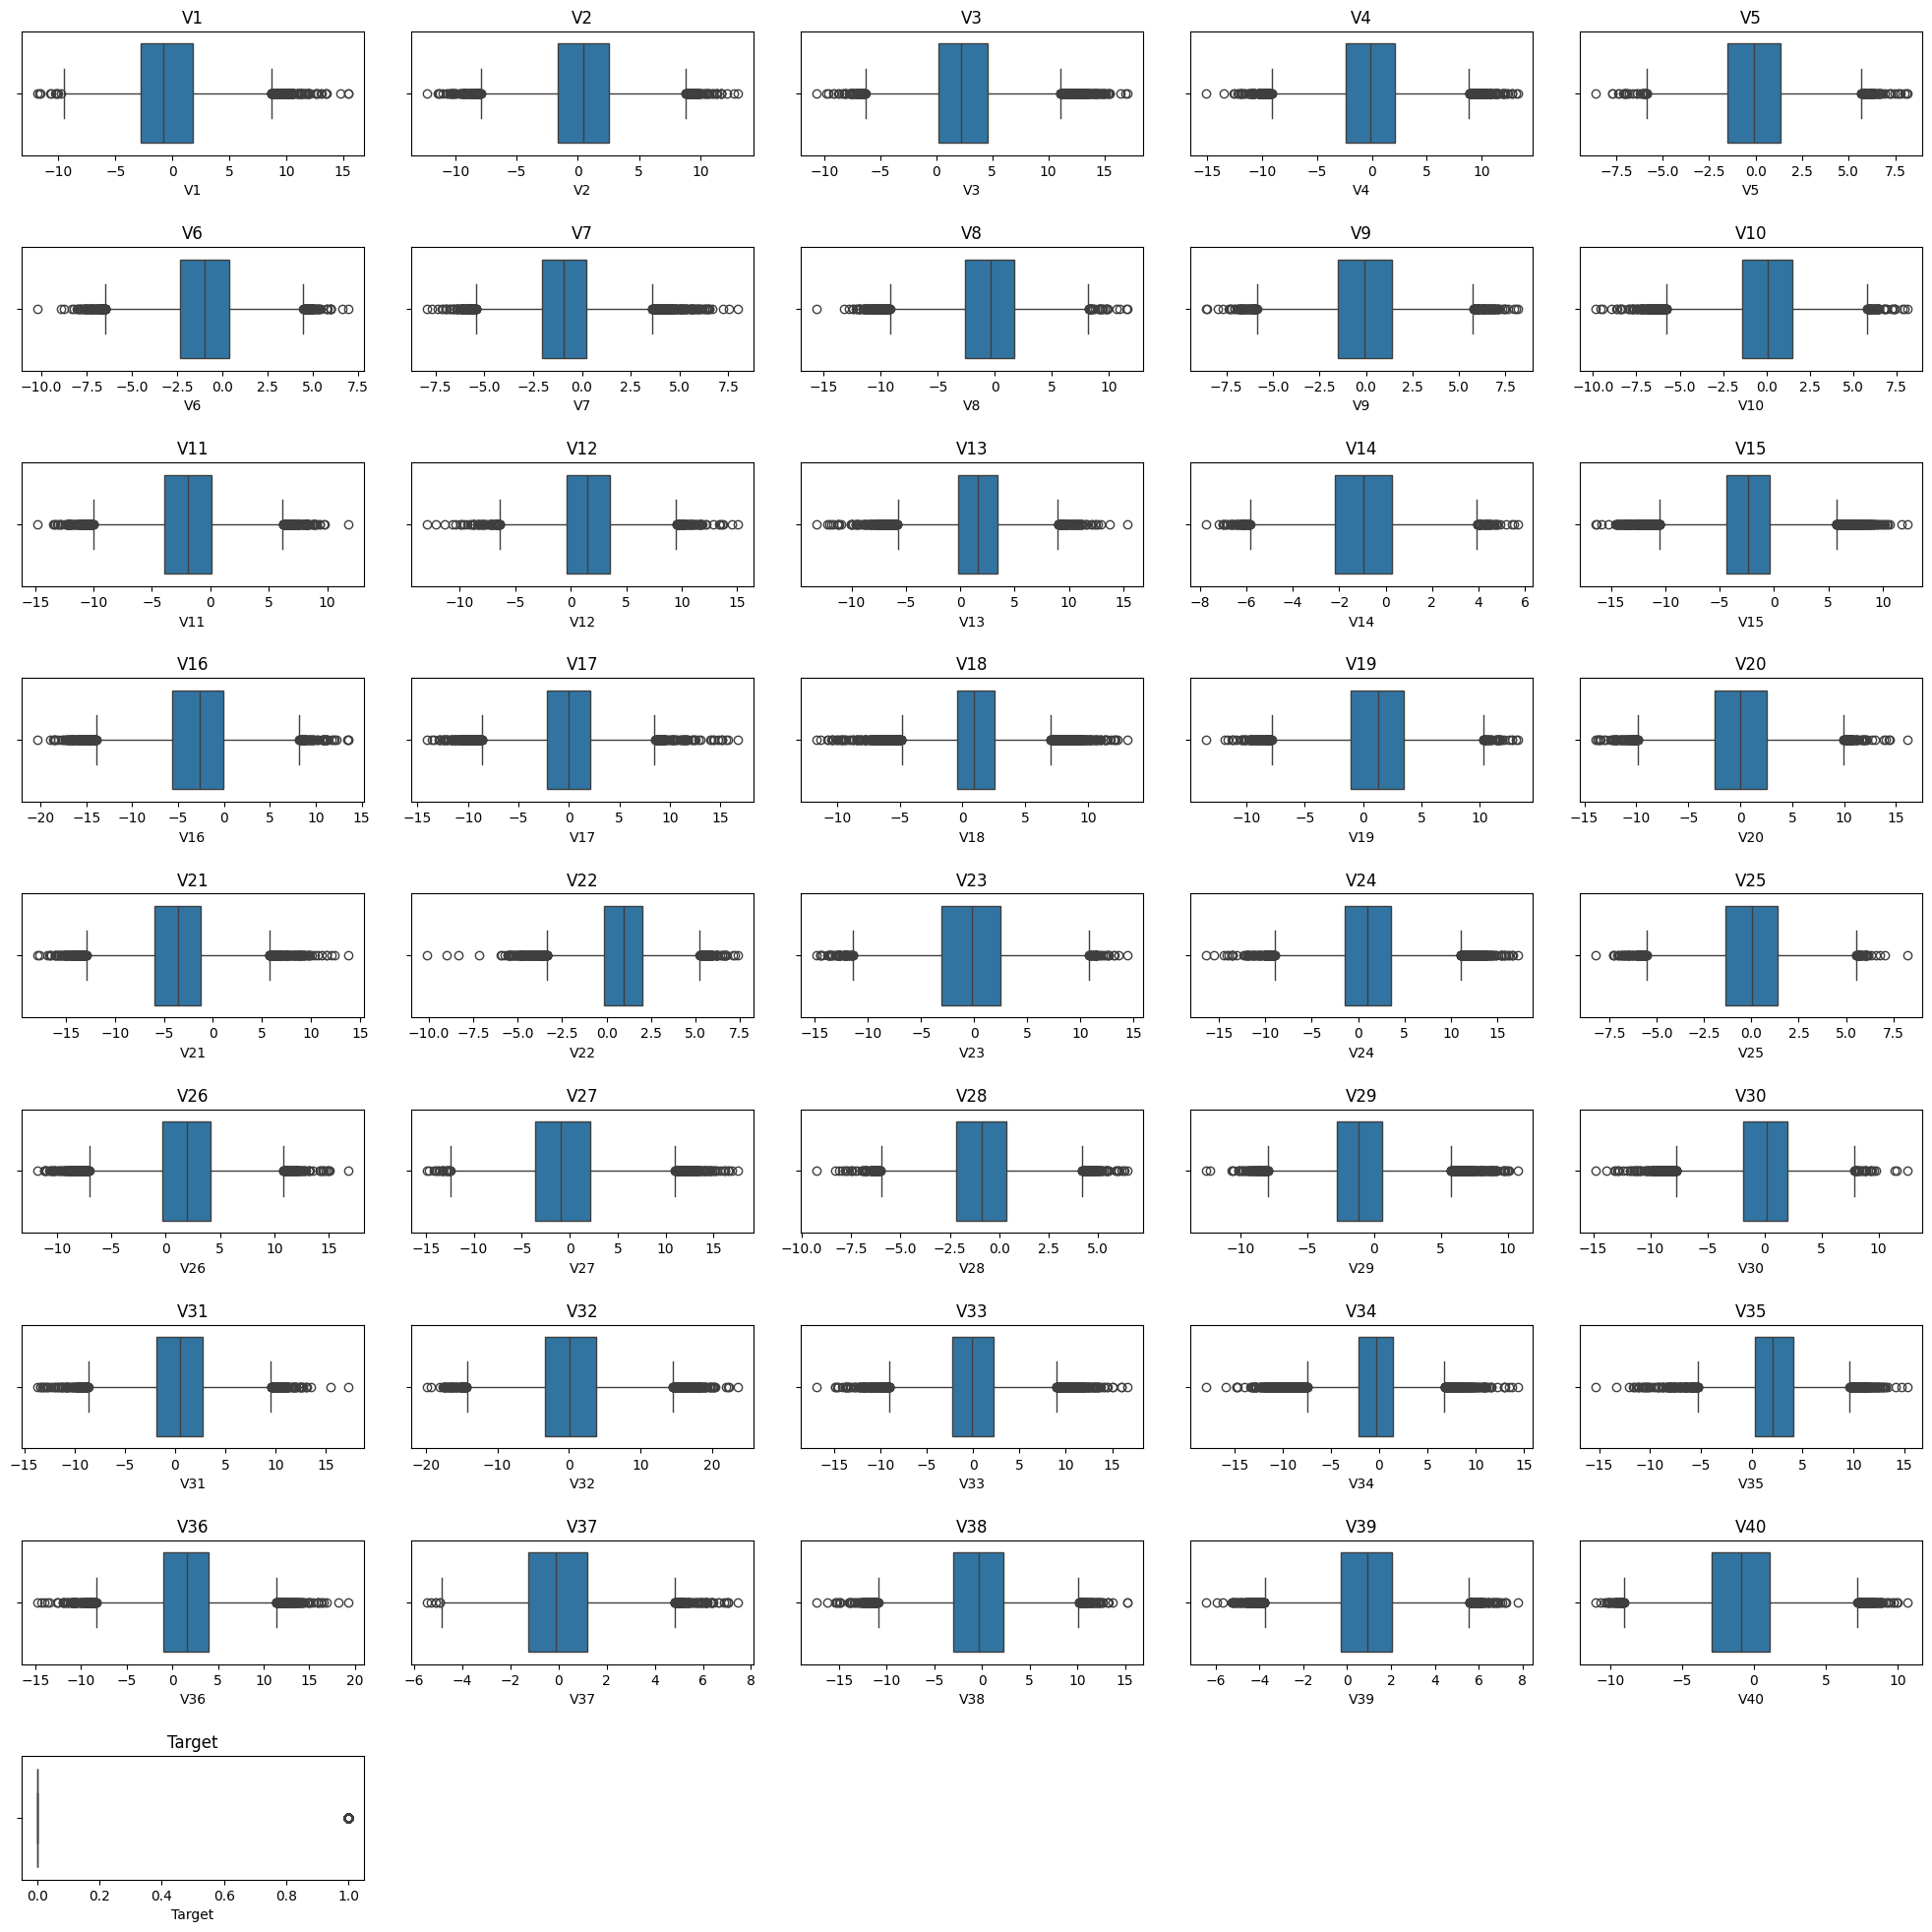

In [ ]:
col_list=data.columns.to_list()
plt.figure(figsize=(20,20))
for i,col in enumerate(col_list):
  plt.subplot(9,5,i+1)
  sns.boxplot(data=data,x=col)
  plt.title(col)
  plt.tight_layout(pad=2)
plt.show()

- Almost every column shows the presence of outliers, which are sensor values falling far from the typical range.

- Although the histograms suggested values are centered around zero, the boxplots reveal that many features are slightly shifted to either the positive or negative side.

- Feature V34 has a very narrow box, indicating that most of its values are tightly packed near zero, though it still has outliers on both sides.

- The box shapes are mostly symmetrical, showing very little skewness in the data.

- The spread between Q1 and Q3 (the box width) looks fairly consistent across most features, and medians seem centered — suggesting a relatively balanced distribution.

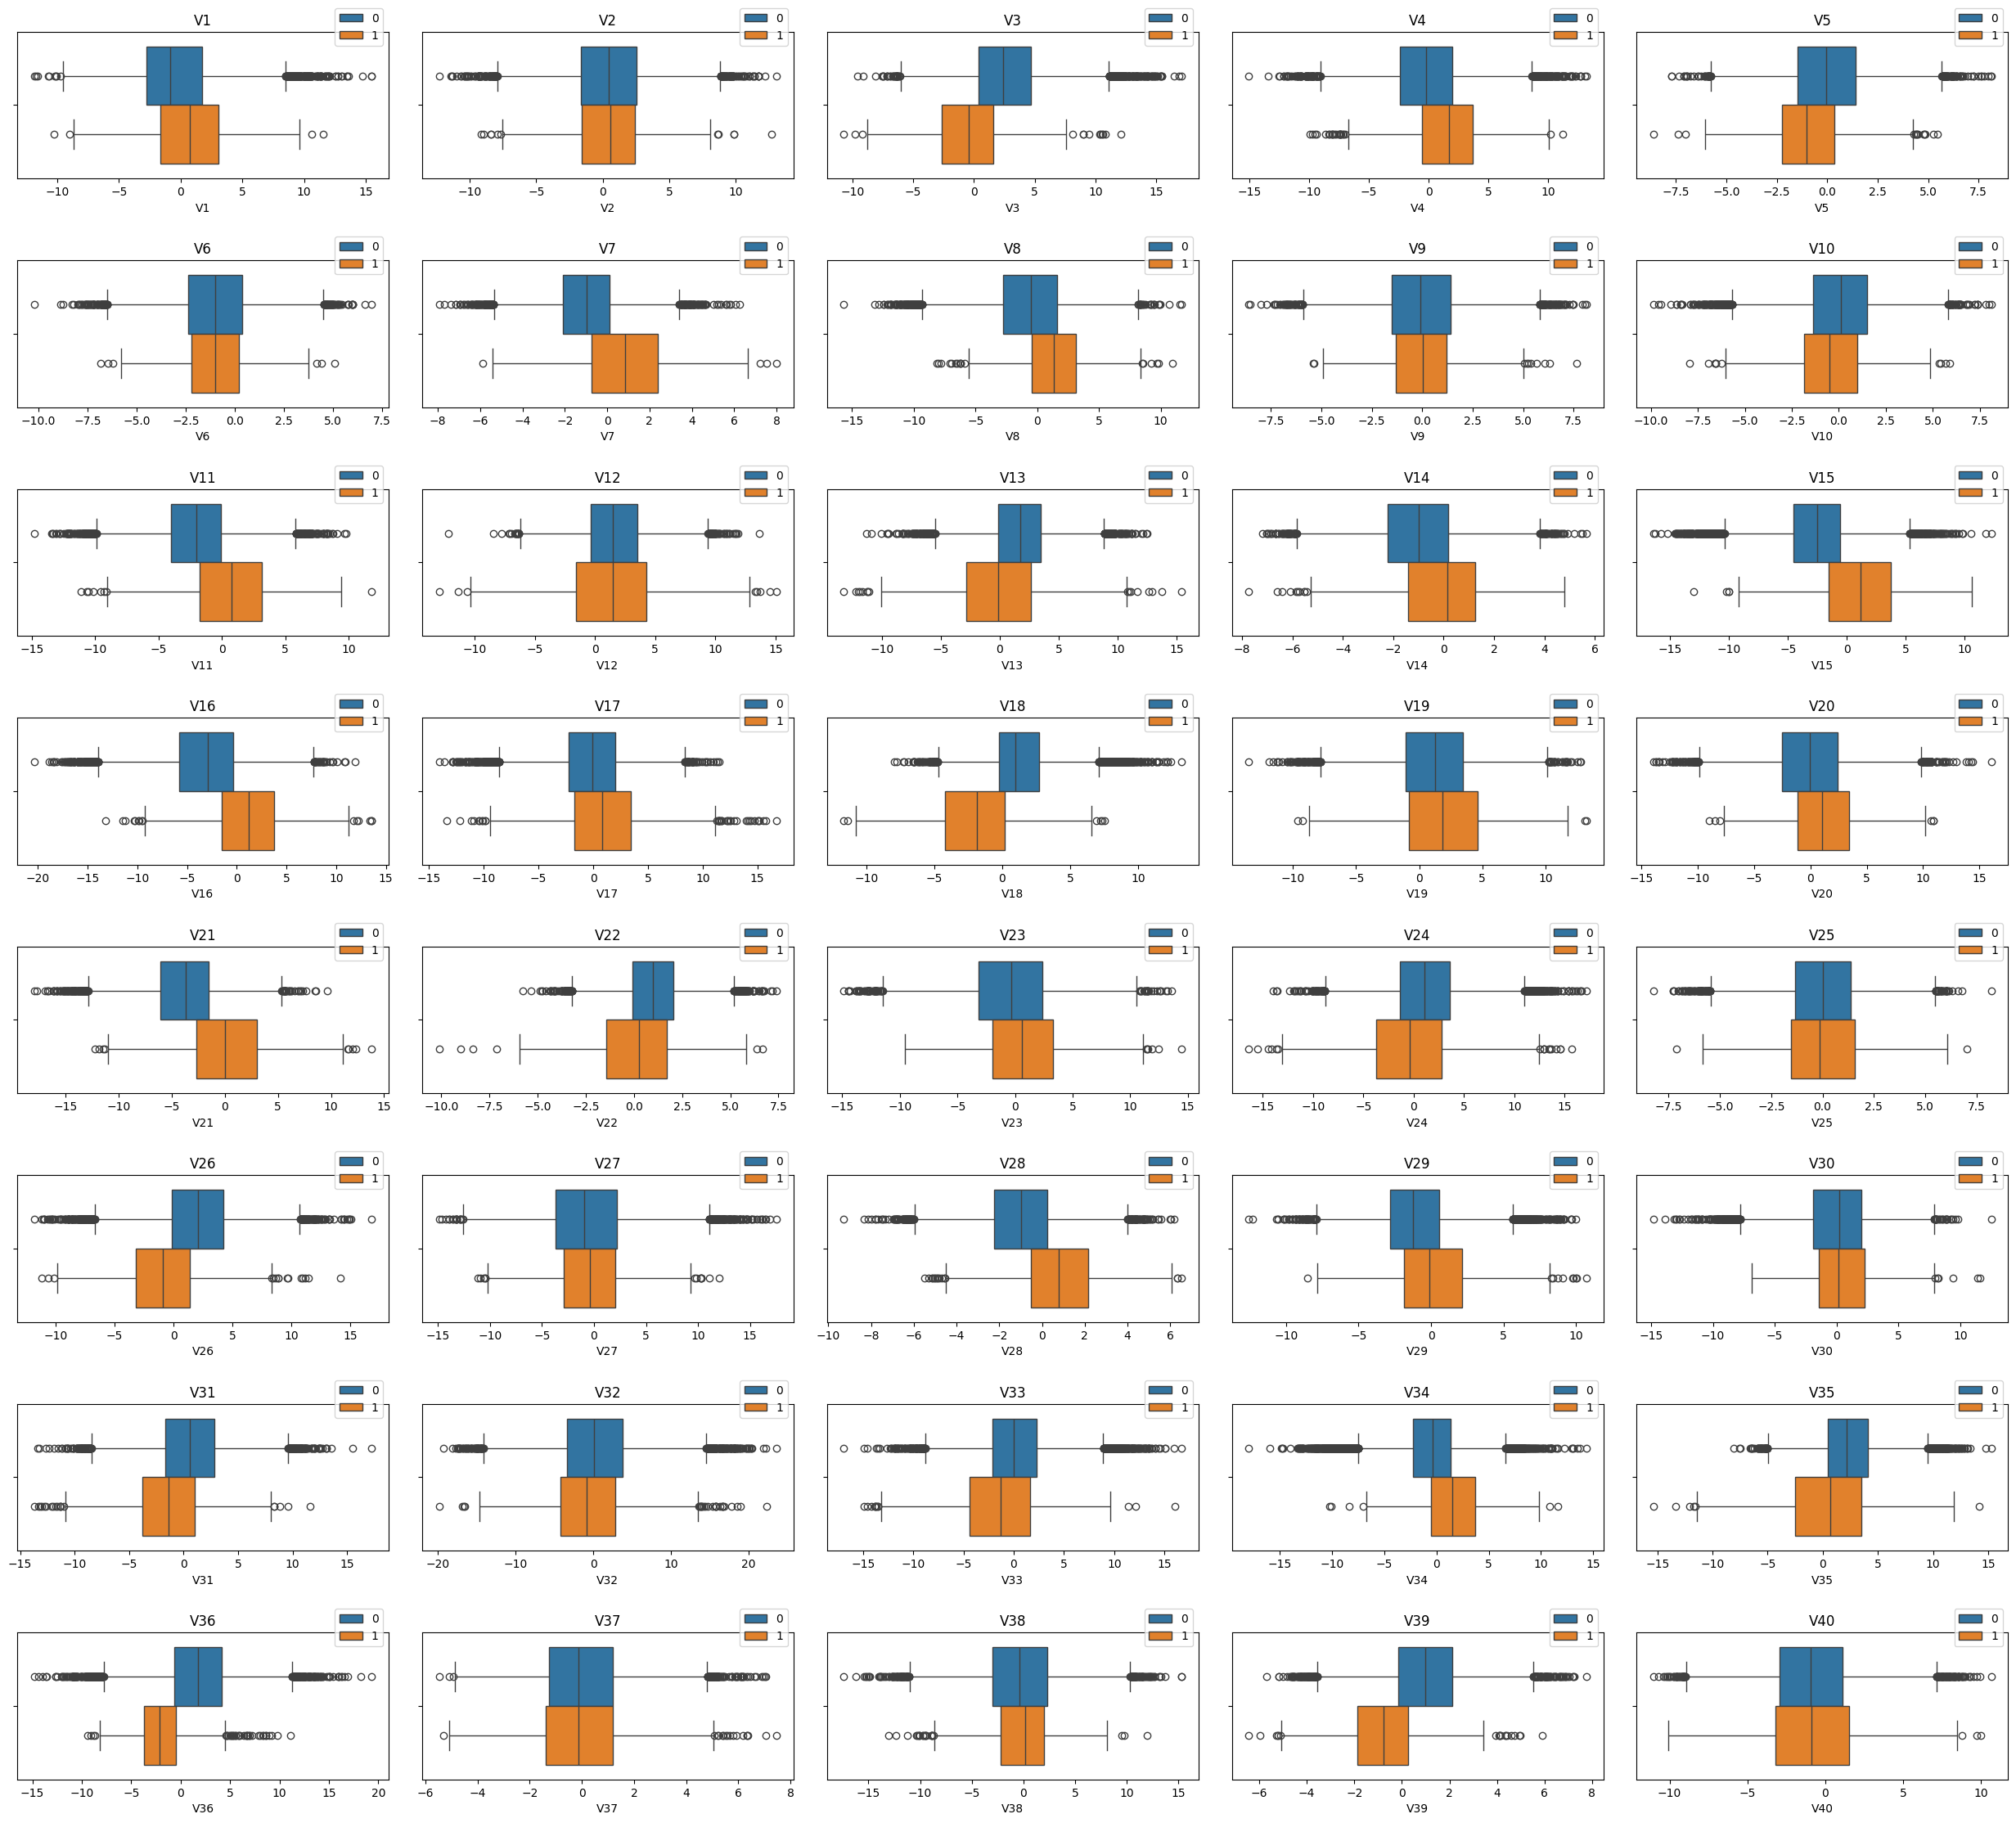

In [ ]:
col_list=data.columns.to_list()
plt.figure(figsize=(25,25))
for i,col in enumerate(col_list[:-1]):
  plt.subplot(9,5,i+1)
  sns.boxplot(data=data,x=col,hue='Target')
  plt.legend(bbox_to_anchor=(1,1.2),loc='upper right')
  plt.title(col)
  plt.tight_layout(pad=2)
plt.show()

- Outliers are present in both class 0 and class 1 across nearly all features.

- Features V2, V6, V12, V30, and V37 appear to have the same median for both classes, indicating no visible shift between class 0 and class 1.

- Except for the above-mentioned features, most other features show a visible median difference between the two classes, and some have a large shift, such as V7 and V15.

- Features such as V4, V17, V31, V36, V37, and V38 show a significantly higher number of outliers in class 1, whereas the rest have comparatively fewer outliers.

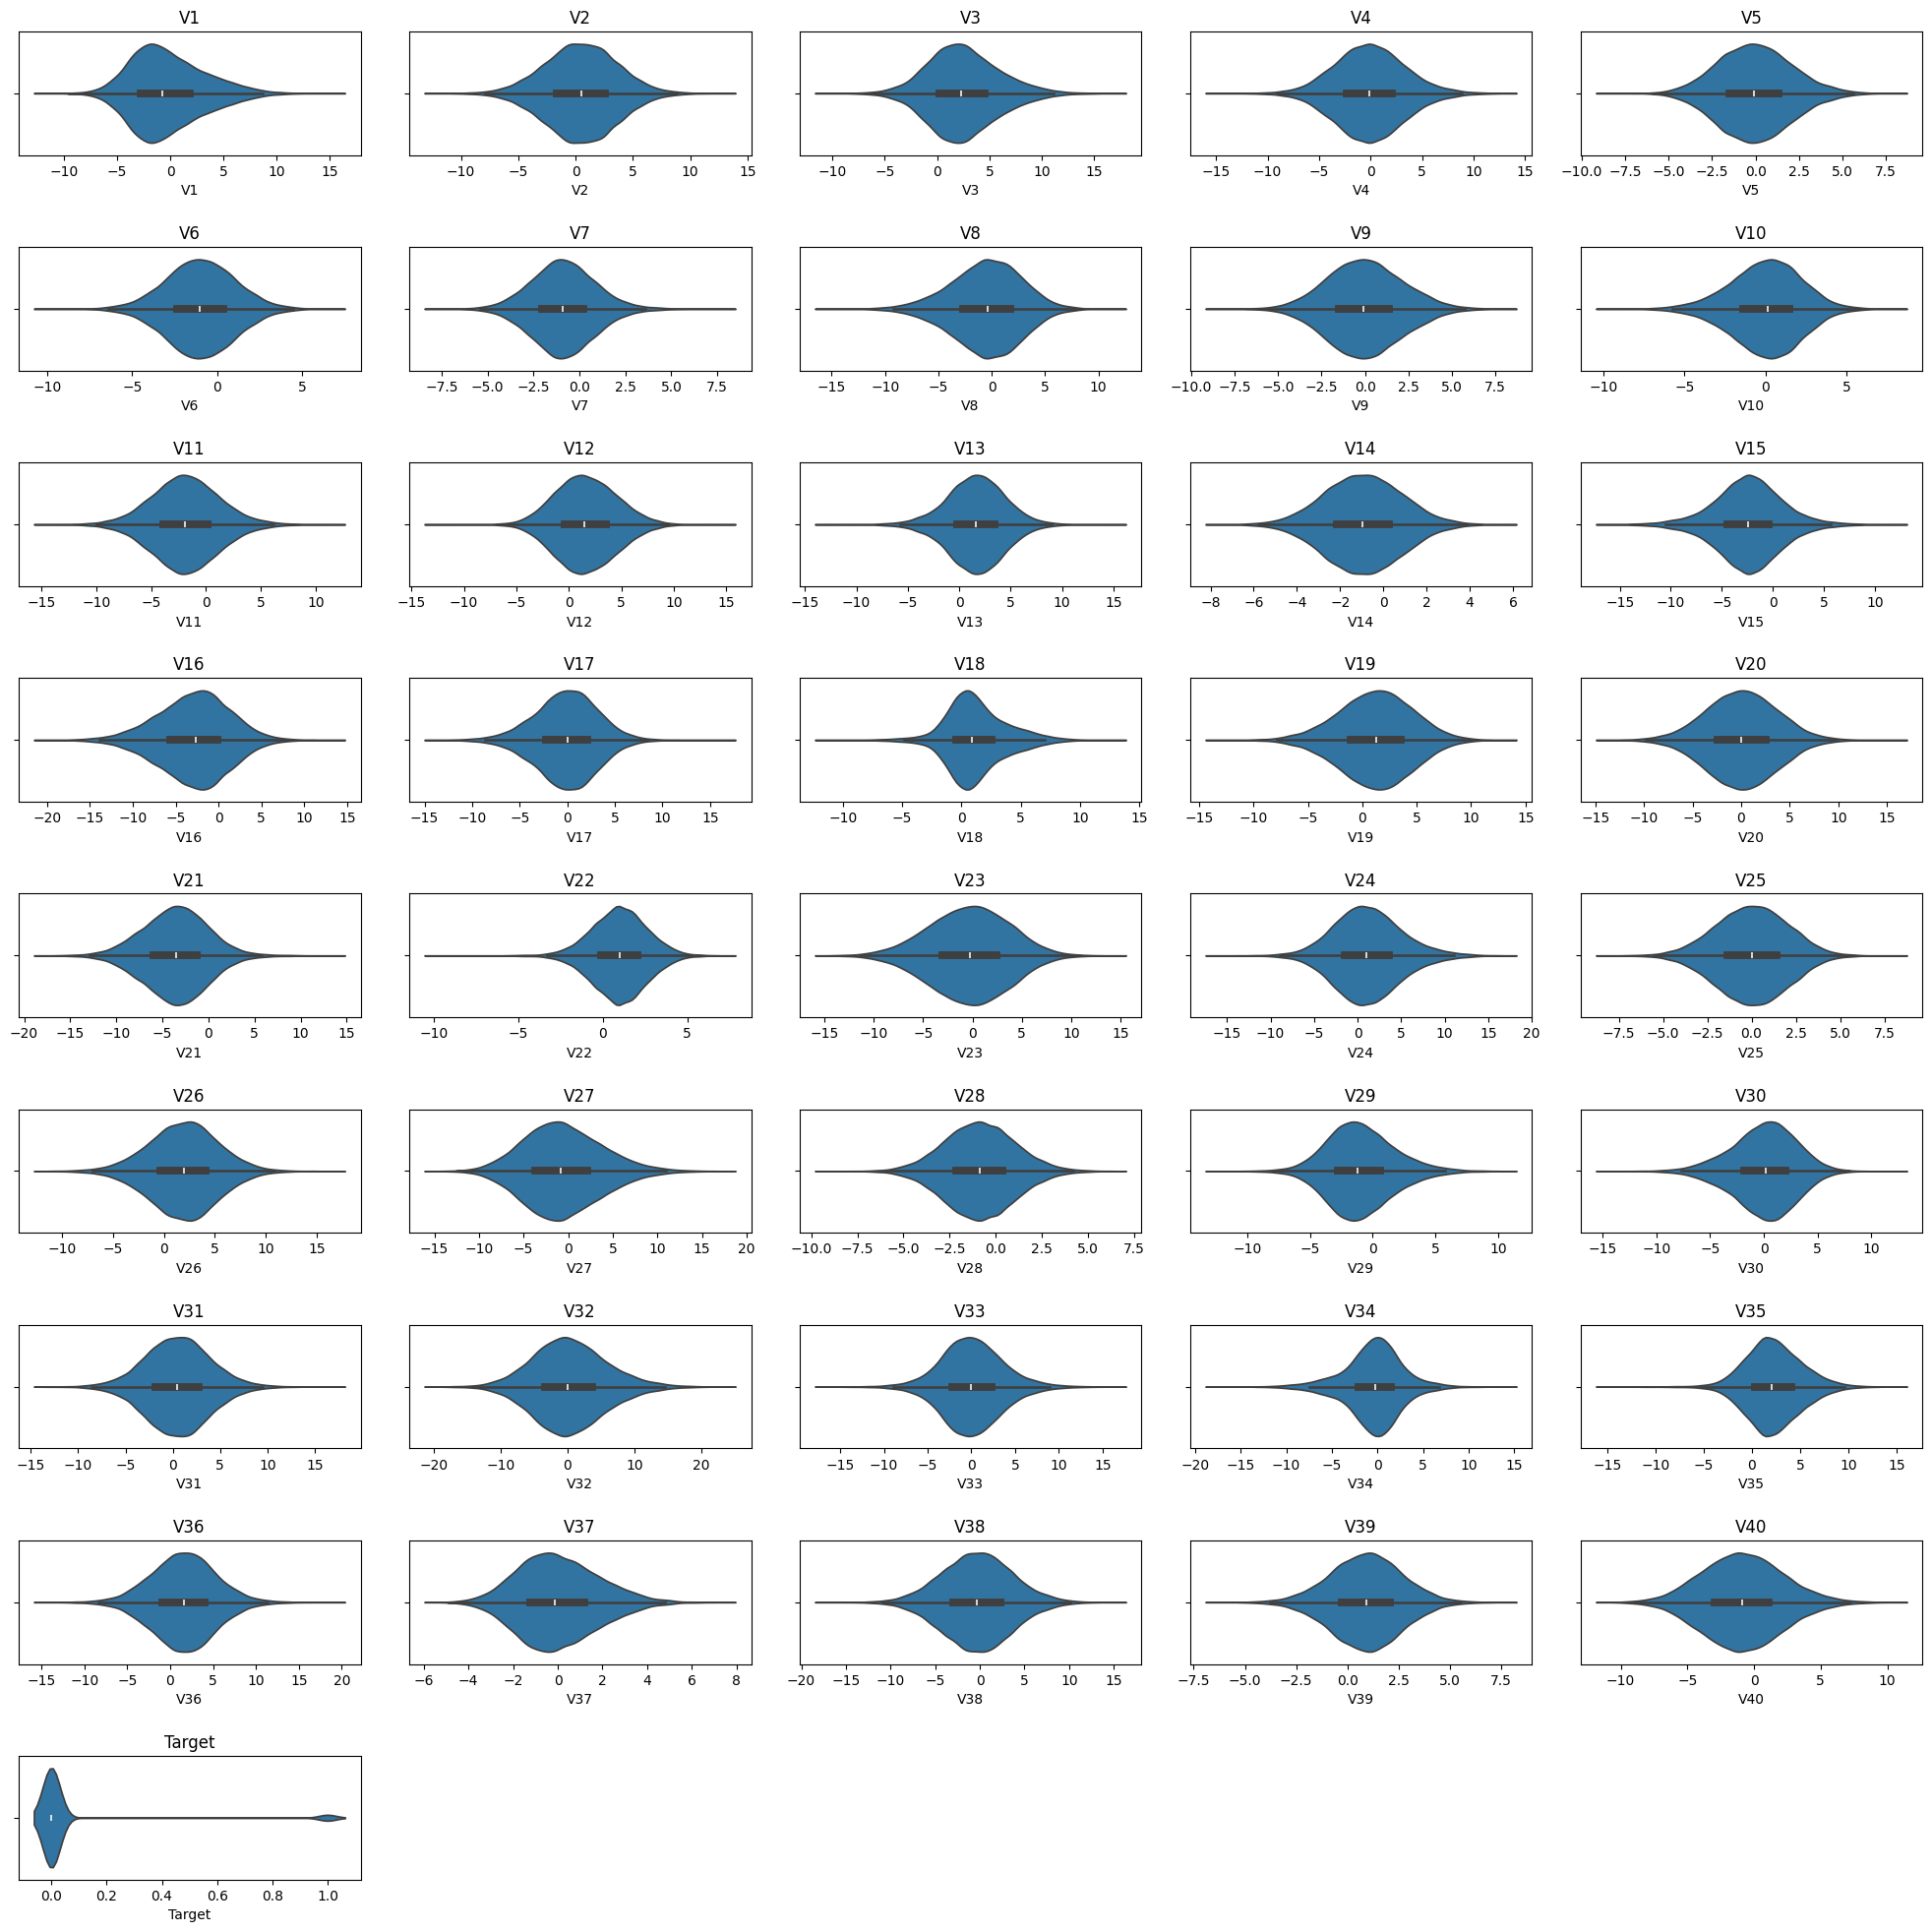

In [ ]:
col_list=data.columns.to_list()
plt.figure(figsize=(20,20))
for i,col in enumerate(col_list):
  plt.subplot(9,5,i+1)
  sns.violinplot(data=data,x=col)
  plt.title(col)
  plt.tight_layout(pad=2)
plt.show()

Distribution Shape Clearly Visible
 - Unlike boxplots, violin plots reveal the exact shape of the distribution. Many features like V1, V3, V10, V13 show smooth, bell-shaped curves, confirming normal-like distribution.

Density Differences in Tails
 - Violin plots expose dense tails in features like V28, V36, and V38, which are not clearly visible in histograms or boxplots. This suggests these variables might be sensitive to anomalies.

Thick vs Thin Distribution Spread
 - Features like V34 and V35 have very narrow violin shapes, indicating most values are concentrated near the median — potential low-variance features.

Asymmetry in Density
 - While boxplots showed symmetrical boxes, violin plots reveal uneven density spread in features like V25 and V30, hinting at underlying skewness or class separation.

Clear Visualization of Class Imbalance in Target
 - The violin for the Target variable visually confirms extreme imbalance — a thick curve at 0 and a thin sliver at 1 — more intuitively than bar/hist plots.

- There is a significant difference in sample sizes between the classes, with class 1 containing approximately 1,000 values and class 0 around 19,000 values.

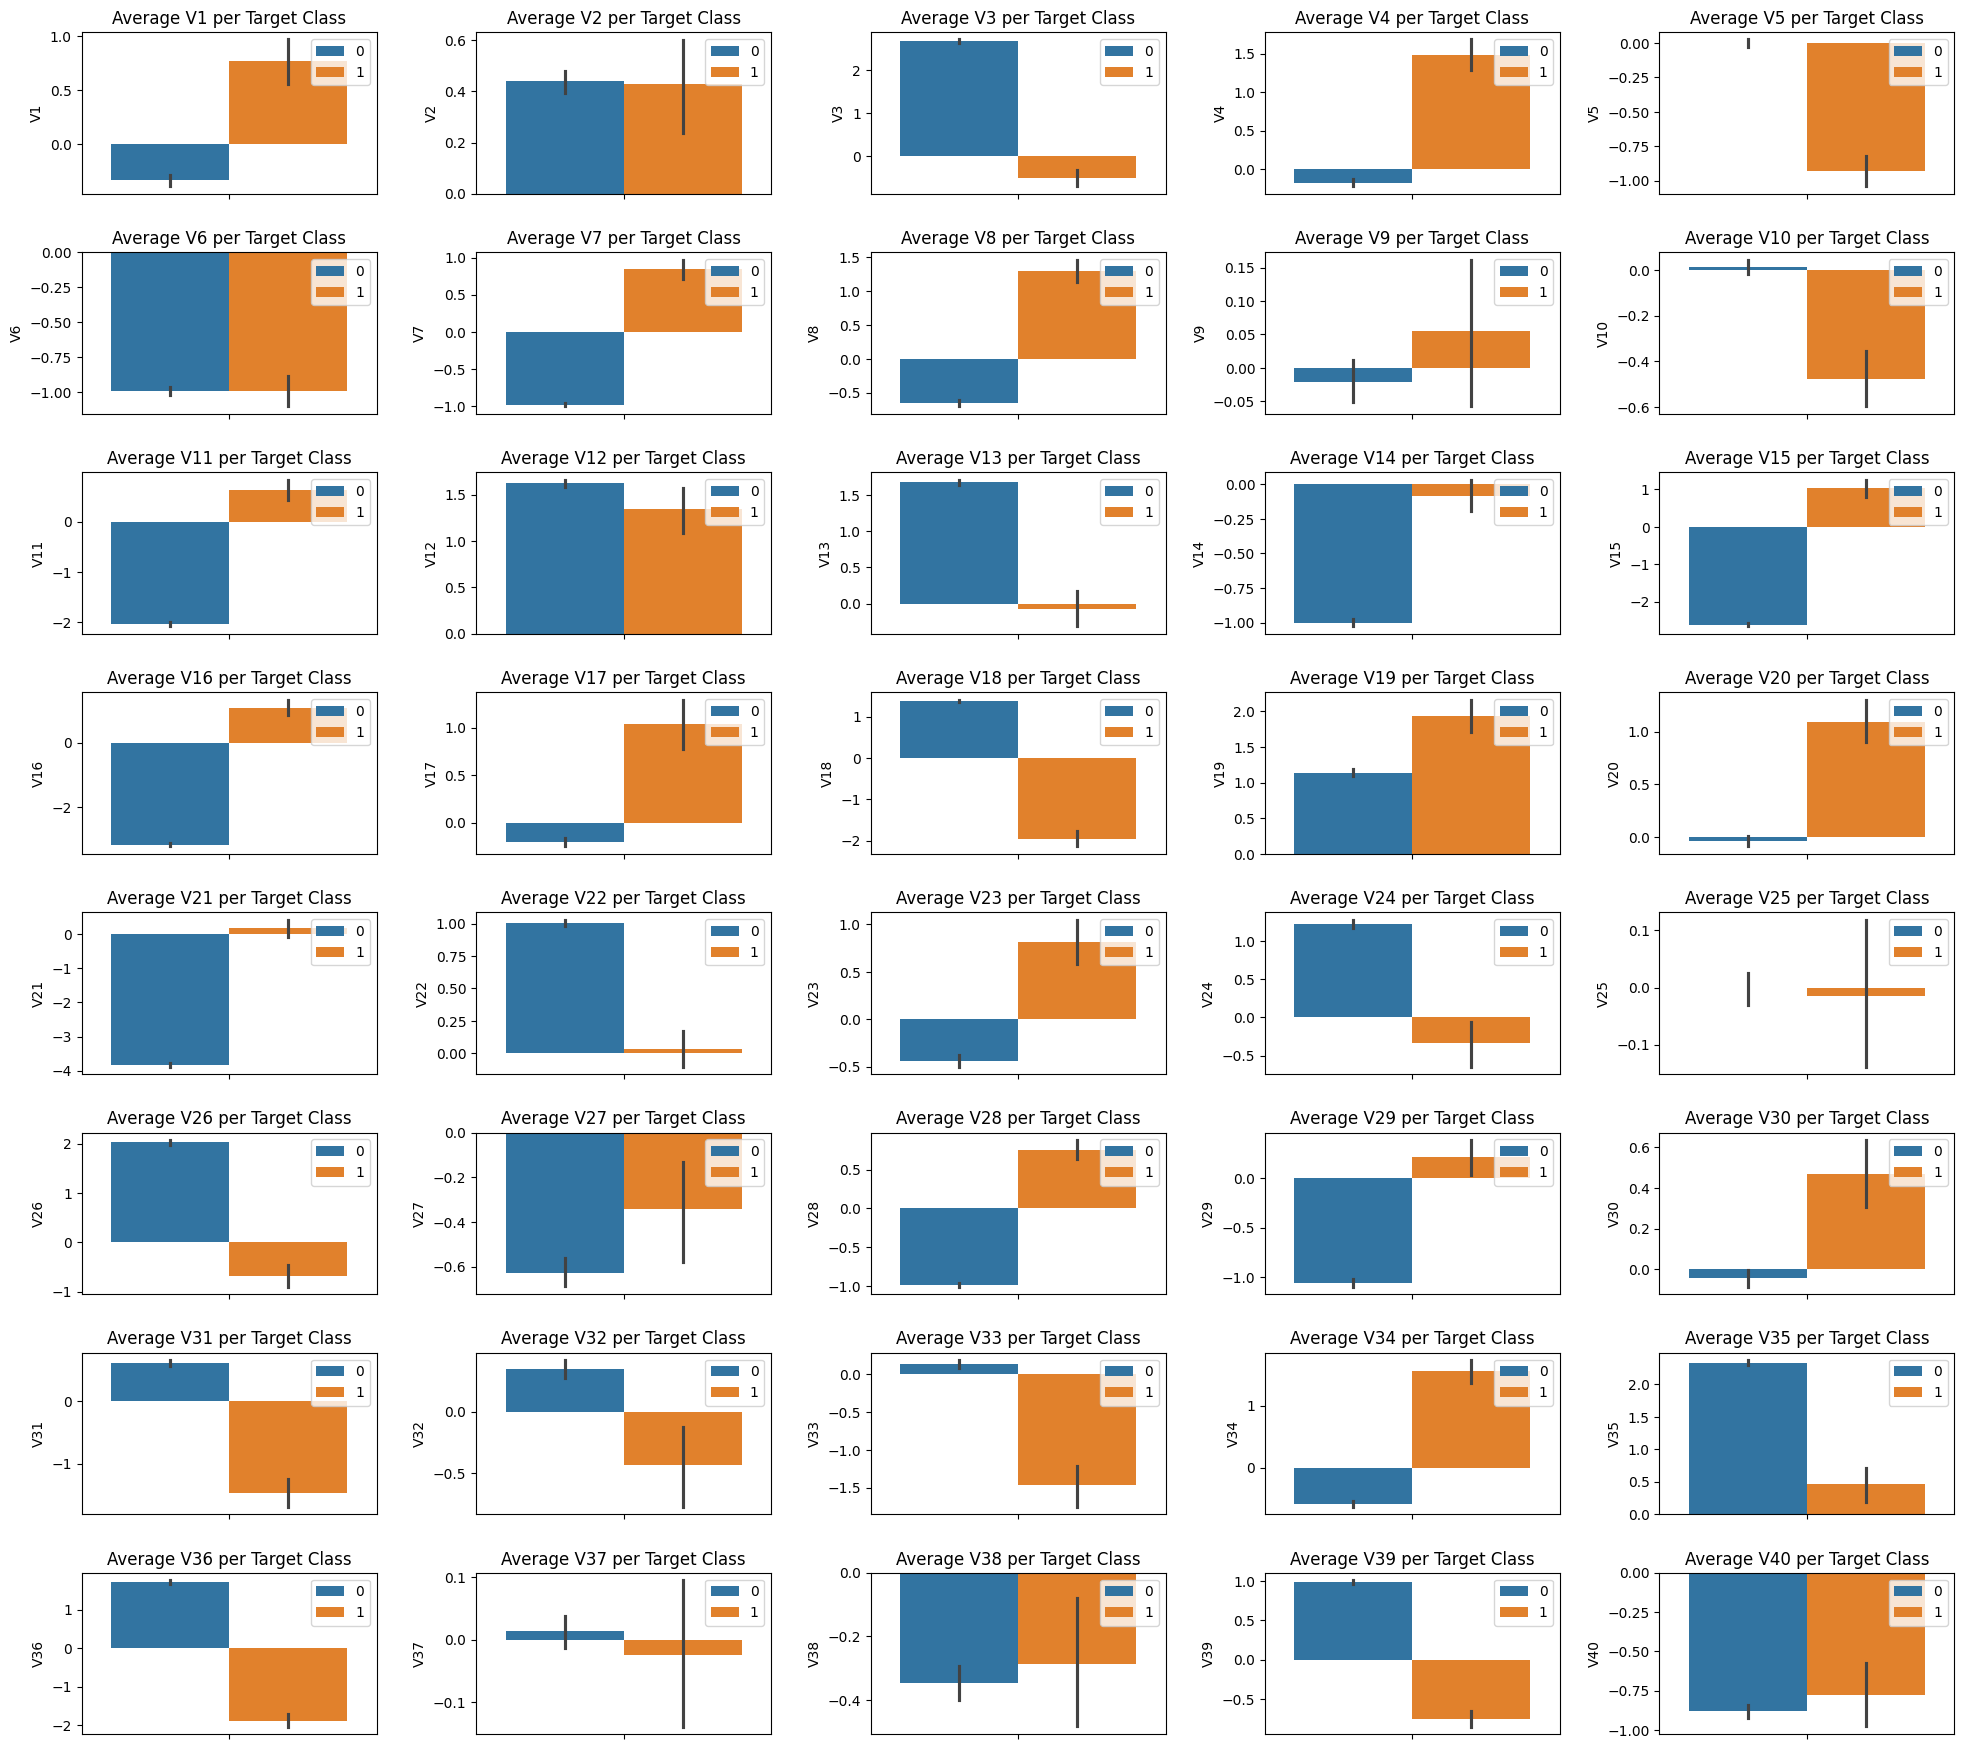

In [ ]:
col_list=data.columns.to_list()
cols=col_list[:-1]
plt.figure(figsize=(20,20))
for i,col in enumerate(cols):
  plt.subplot(9,5,i+1)
  sns.barplot(data=data,y=col,hue='Target')
  plt.tight_layout(pad=2)
  plt.title(f"Average {col} per Target Class")
  plt.legend(loc='upper right')
plt.show()

- Most features show average values centered around zero, where:

 - A positive shift from zero tends to indicate one class.

 - A negative shift from zero tends to indicate the other.

 - This implies many features are sensitive around the zero threshold.

- Feature V25 stands out:

 - While values for both classes cluster near zero, class 1 displays a broader range on both the positive and negative sides.

 - This suggests higher variability in V25 for class 1.

- Across the features, class 1 (Failure) exhibits consistently higher variance, indicating a wider spread of sensor readings in failed cases.

- Some features (e.g., V3, V13, V15, etc.) start entirely from negative values, regardless of class.

 - While this might seem unusual, it's acceptable given that this is sensor data, and we don't have domain knowledge about how these sensors are calibrated or scaled.

- Based on the plots, we can confirm that the columns V40, V38, V27, V14, and V6 contain only negative values.

- In column V5, class 0 appears when the variation is slight, whereas class 1 is observed when the variation is high.

## **Bivariate Analysis**

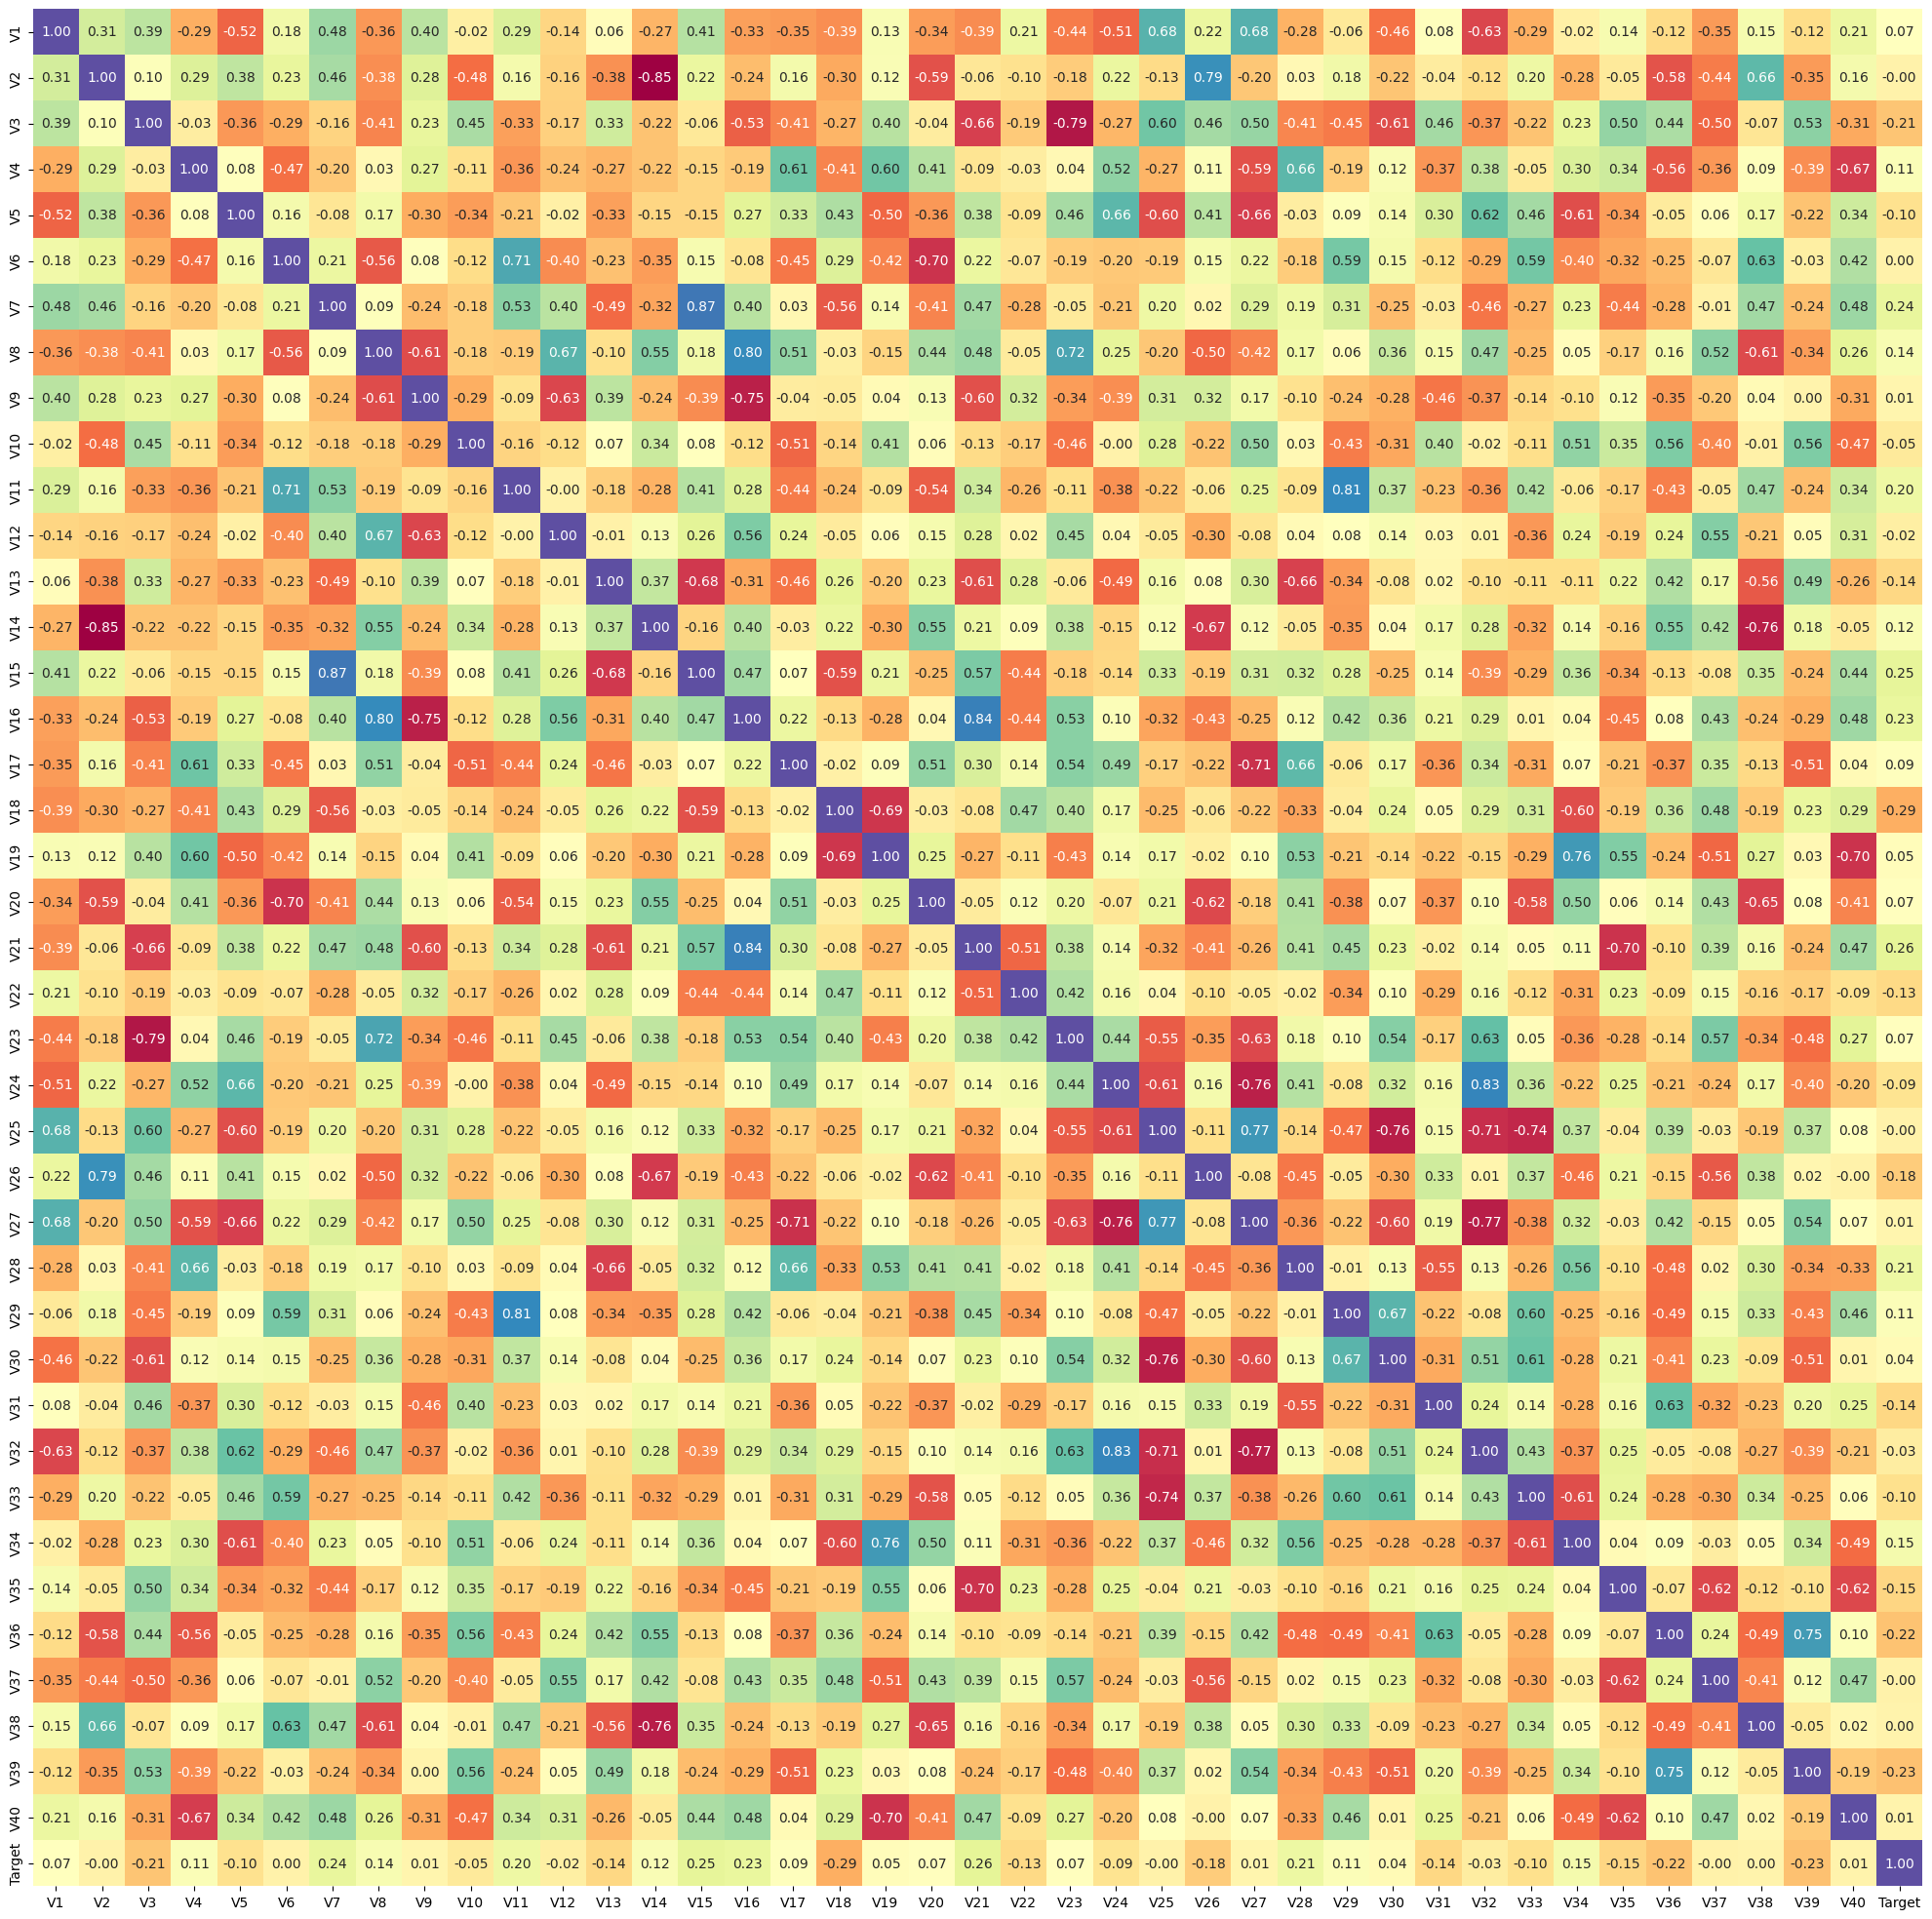

In [ ]:
plt.figure(figsize=(25,25))
sns.heatmap(data.corr(),annot=True,fmt='.2f',cbar=False,cmap='Spectral')
plt.show()

- Some columns are highly correlated with each other — for example, V15 and V7 have a correlation of 0.87, and V16 and V8 share a correlation of around 0.80.

- There are also strong negative correlations between independent features — for instance, V2 and V14 have a correlation of -0.85.

- However, it's clear that there is no strong correlation between the independent variables and the target (dependent variable). The highest positive correlation is V15 with Target at around +0.25, while V18 shows the highest negative correlation around -0.29.

In [ ]:
col_list=data.columns.to_list()
cols=col_list[:10]
sns.pairplot(data=data,vars=cols,corner=True,hue='Target')
plt.legend(loc='upper left')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
col_list=data.columns.to_list()
cols=col_list[11:20]
sns.pairplot(data=data,vars=cols,corner=True,hue='Target')
plt.legend(loc='upper left')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
col_list=data.columns.to_list()
cols=col_list[21:30]
sns.pairplot(data=data,vars=cols,corner=True,hue='Target')
plt.legend(loc='upper left')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
col_list=data.columns.to_list()
cols=col_list[31:40]
sns.pairplot(data=data,vars=cols,corner=True,hue='Target')
plt.legend(loc='upper left')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

- Due to the high number of columns, it's not feasible to visually compare every feature against each other. For example, we can't easily observe relationships between V1 to V50 in a single plot. But luckily, we can use the correlation matrix shown in a heatmap to get the correlation values directly. The pairplot is like an extended version of the correlation matrix, showing not only correlation numbers but also distributions and scatter relationships, providing additional insights beyond just correlation coefficients.

- From all the pair plots, we observe that for several feature combinations, there are clear clusters or threshold regions. When the feature values cross these limits, the data tends to belong to class 1, which may indicate a failure or abnormal condition. This pattern supports the idea that specific sensor ranges are strongly associated with the target class shift.

- Target Class 1 Is Sparse But Distinct
 - Although class 1 is less frequent (imbalance), its points often lie outside the high-density regions of class 0.

 - This indicates potential for outlier-based methods or decision boundaries in those regions.

- Correlation Patterns Match Visual Separation
 - Many variables that are strongly correlated (positively or negatively) in the heatmap (e.g., V7-V15, V8-V16) also show clear aligned or diagonal scatter patterns in pair plots.

 - This validates the heatmap insight with real data patterns.

In [ ]:
col_list=list(data.columns)
for i in col_list:
  print(f'The number of unique values in {i} is {data[i].nunique()}')

The number of unique values in V1 is 19982
The number of unique values in V2 is 19982
The number of unique values in V3 is 20000
The number of unique values in V4 is 20000
The number of unique values in V5 is 20000
The number of unique values in V6 is 20000
The number of unique values in V7 is 20000
The number of unique values in V8 is 20000
The number of unique values in V9 is 20000
The number of unique values in V10 is 20000
The number of unique values in V11 is 20000
The number of unique values in V12 is 20000
The number of unique values in V13 is 20000
The number of unique values in V14 is 20000
The number of unique values in V15 is 20000
The number of unique values in V16 is 20000
The number of unique values in V17 is 20000
The number of unique values in V18 is 20000
The number of unique values in V19 is 20000
The number of unique values in V20 is 20000
The number of unique values in V21 is 20000
The number of unique values in V22 is 20000
The number of unique values in V23 is 200

- Since each column contains entirely unique values (e.g., 20000 distinct values across 20000 rows), categorical methods like crosstab are not applicable. Therefore, we conclude the bivariate analysis using the correlation heatmap and pair plot, which are better suited for continuous, high-cardinality features.

# **DATA PRE-PROCESSING**

In [ ]:
data.duplicated().sum()

np.int64(0)

- We can confirm that there are no duplicate rows in the entire dataset.

## **V1 & V2 Missing Value Overview**

In [ ]:
data.isnull().sum()[data.isnull().sum() > 0]

V1    18
V2    18
dtype: int64

- We observed that both the V1 and V2 columns each have 18 missing values.
- Next, we will investigate whether there is any pattern to these missing values and if they occur simultaneously in both columns.

In [ ]:
print(f"The percentage of missing values in V1 is {data.loc[data['V1'].isnull()==True,'V1'].shape[0]/data.shape[0]}")
print(f"\nThe percentage of missing values in V2 is {data.loc[data['V2'].isnull()==True,'V2'].shape[0]/data.shape[0]}\n")
print(f"The precentage of total missing values is {data.loc[data['V1'].isnull()==True,'V1'].shape[0]/data.shape[0]+data.loc[data['V2'].isnull()==True,'V2'].shape[0]/data.shape[0]}")


The percentage of missing values in V1 is 0.0009

The percentage of missing values in V2 is 0.0009

The precentage of total missing values is 0.0018


- The percentage of missing values in both V1 and V2 is very low (0.0018%).
If no specific pattern is observed in the missing data and the missing values are present only in one target class (particularly Class 0), we will choose to drop those rows rather than impute them.

In [ ]:
print(f"Checking if there's a pattern: when V1 has a missing value, does V2 also have one?\n{data.loc[data['V1'].isnull(), ['V1', 'V2','Target']]}")
print('*'*30)
print(f"Checking if there's a pattern: when V2 has a missing value, does V1 also have one?\n{data.loc[data['V2'].isnull(), ['V1', 'V2','Target']]}")

Checking if there's a pattern: when V1 has a missing value, does V2 also have one?
       V1        V2  Target
89    NaN -3.961403       0
5941  NaN  1.008391       0
6317  NaN -5.205346       0
6464  NaN  2.146202       0
7073  NaN  2.534010       0
8431  NaN -1.398710       0
8439  NaN -3.840585       0
11156 NaN -0.666978       0
11287 NaN -2.561519       0
11456 NaN  1.299595       0
12221 NaN -2.326319       0
12447 NaN  0.752613       0
13086 NaN  2.056243       0
13411 NaN  2.704511       0
14202 NaN  7.038653       0
15520 NaN  1.382556       0
16576 NaN  3.933815       0
18104 NaN  1.492173       0
******************************
Checking if there's a pattern: when V2 has a missing value, does V1 also have one?
             V1  V2  Target
613   -2.048681 NaN       0
2236  -3.760658 NaN       0
2508  -1.430888 NaN       0
4653   5.465769 NaN       0
6810  -2.631454 NaN       0
7788  -4.203459 NaN       0
8483  -4.484232 NaN       0
8894   3.263555 NaN       0
8947  -3.793170 NaN

- From the output above, it’s clear that the missing values in V1 and V2 do not occur simultaneously.

- When V1 is missing, V2 has valid values, and vice versa.

- Therefore, there is no observable pattern or dependency between the missing values in these two features.

- Additionally, all missing values are found exclusively in Class 0 of the target variable.

**Based on these observations, and given the very low percentage of missing values (0.0009%), we will drop the rows with missing values instead of imputing, as this will have minimal impact and avoids unnecessary bias.**

In [ ]:
data_clean = data.dropna(subset=['V1', 'V2']).reset_index(drop=True)

- After dropping rows with missing values in columns 'V1' and 'V2', it's important to reset the index to maintain a clean, sequential order. Using reset_index(drop=True) ensures that the old index is removed entirely and a new one is assigned, preventing the old index from being added as a separate column.

In [ ]:
print(f"The dataset has {data.shape[0]} rows and {data.shape[1]} columns before dropping missing values.")
print(f"\nAfter dropping missing values, the dataset has {data_clean.shape[0]} rows and {data_clean.shape[1]} columns.")

The dataset has 20000 rows and 41 columns before dropping missing values.

After dropping missing values, the dataset has 19964 rows and 41 columns.


## **Split the data into train and test sets**

In [ ]:
# Create the feature set by dropping the target column 'Target'
x=data_clean.drop(['Target'],axis=1)

# Create the label set by extracting the target column 'Target'
y=data_clean['Target']

In [ ]:
# Split the training dataset into training and validation sets (60% train, 40% val)
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.4, stratify=y, random_state=RS)

- Since we have a separate test dataset containing 5000 rows, we only need to split the available training data for training and validation purposes. Therefore, we split 60% for training and 40% for validation.

In [ ]:
print(f'The number of rows in x is {x.shape[0]} and the column is {x.shape[1]} \n')
print('*'*80,'\n')
print(f"The percentage of classes in y is {y.value_counts(1)}\n")
print('*'*80,'\n')
print(f'The number of rows in training set of x is {x_train.shape[0]} and the column is {x_train.shape[1]} \n')
print('*'*80,'\n')
print(f"The percentage of classes in y is {y_train.value_counts(1)}\n")
print('*'*80,'\n')
print(f'The number of rows in validation set of x is {x_val.shape[0]} and the column is {x_val.shape[1]} \n')
print('*'*80,'\n')
print(f"The percentage of classes in y is {y_val.value_counts(1)}\n")

The number of rows in x is 19964 and the column is 40 

******************************************************************************** 

The percentage of classes in y is Target
0    0.9444
1    0.0556
Name: proportion, dtype: float64

******************************************************************************** 

The number of rows in training set of x is 11978 and the column is 40 

******************************************************************************** 

The percentage of classes in y is Target
0    0.944398
1    0.055602
Name: proportion, dtype: float64

******************************************************************************** 

The number of rows in validation set of x is 7986 and the column is 40 

******************************************************************************** 

The percentage of classes in y is Target
0    0.944403
1    0.055597
Name: proportion, dtype: float64



# **Model Building**

## **Utility functions**

In [ ]:
def plot_confusion_matrix(cf,group_Names=None,categories='auto',cmap='Blues',cbar=True,percent=True,count=True,figsize=None,title=None,sum_stats=True,xyticks=True,xyplotlabels=True):

  blanks=['' for i in range(cf.size)]  # Blank placeholders for labels if not used

  if group_Names and len(group_Names)==cf.size:  # Check if custom group names match the matrix size
    group_labels=[i for i in group_Names]
  else:
    group_labels=blanks  # Use blank if group names are not properly provided

  if count:
    group_count=[f'{i:.0f}' for i in cf.flatten()]  # Convert counts to string format
  else:
    group_count=blanks  # Skip counts if not requested

  if percent:
    group_percent=[f'{i/cf.flatten().sum():.2%}' for i in cf.flatten()]  # Convert to percentage
  else:
    group_percent=blanks  # Skip percentages if not requested

  box_labels=[f'{v1}\n{v2}\n{v3}'.strip() for v1,v2,v3 in zip(group_labels,group_count,group_percent)]  # Combine labels
  box_labels=np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])  # Reshape to match matrix

  if sum_stats:
    Accuracy=np.trace(cf)/float(np.sum(cf))  # Accuracy = correct predictions / total
    if len(cf)==2:
      Precision=cf[1,1]/sum(cf[:,1])  # Precision = TP / (TP + FP)
      Recall=cf[1,1]/sum(cf[1,:])     # Recall = TP / (TP + FN)
      F1=2*Precision*Recall/(Precision+Recall)  # F1-score formula
      sum_texts=f'\n\nAccuracy={Accuracy:.3f}\nPrecision={Precision:.3f}\nRecall={Recall:.3f}\nF1={F1:.3f}'  # Format stats
    else:
      sum_texts=f'\n\nAccuracy={Accuracy:.3f}'  # Only accuracy for multiclass
  else:
    sum_texts=''  # No stats if not requested

  if figsize==None:
    figsize=plt.rcParams.get('figure.figsize')  # Use default figsize

  if xyticks==False:
    categories=False  # Don't show tick labels

  plt.figure(figsize=figsize)  # Set figure size
  sns.heatmap(cf,annot=box_labels,cmap=cmap,cbar=cbar,fmt='',xticklabels=categories,yticklabels=categories)  # Plot heatmap

  if xyplotlabels:
    plt.ylabel('True Values')  # Add Y label
    plt.xlabel('Predicted Values'+sum_texts)  # Add X label and stats
  else:
    plt.xlabel(sum_texts)  # Only stats if no XY labels

  if title:
    plt.title(title)  # Optional title


In [ ]:
def plot_history(history, name, another_name):
    """
    Plots training and validation metrics over epochs.

    Parameters:
    - history: Keras History object after model training.
    - name: Primary metric to plot (e.g., 'loss', 'accuracy', 'recall').
    - another_name: Secondary metric to plot (e.g., 'recall', 'accuracy').
    """

    fig, ax = plt.subplots(1, 2, figsize=(14, 6))

    # Plotting primary metric
    ax[0].plot(history.history[name])
    ax[0].plot(history.history['val_' + name])
    ax[0].set_title('Model ' + name.capitalize())
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylabel(name.capitalize())
    ax[0].legend(['Train', 'Validation'])

    # Plotting secondary metric
    ax[1].plot(history.history[another_name])
    ax[1].plot(history.history['val_' + another_name])
    ax[1].set_title('Model ' + another_name.capitalize())
    ax[1].set_xlabel('Epoch')
    ax[1].set_ylabel(another_name.capitalize())
    ax[1].legend(['Train', 'Validation'])

    plt.tight_layout()
    plt.show()


In [ ]:
#Defining the columns of the dataframe which are nothing but the hyper parameters and the metrics.
columns = ["# hidden layers","# neurons - hidden layer","activation function - hidden layer ","# epochs","batch size","optimizer","learning rate, momentum","weight initializer","regularization","train loss","validation loss","train recall","validation recall","time (secs)"]

#Creating a pandas dataframe.
results = pd.DataFrame(columns=columns)

##Model 0

- This is a baseline model consisting of only an input layer and an output layer, with no hidden layers.

- We'll use standard Gradient Descent as the optimizer.

- The model will be trained for 50 epochs, meaning it will go through the entire dataset 50 times.

- A batch size of 32 is used, so the model updates its weights after processing every 32 samples.

In [ ]:
# Clears the current Keras session to free up memory and reset layer naming
tf.keras.backend.clear_session()

In [ ]:
# Baseline model with no hidden layers; single neuron with sigmoid activation for binary classification
model = Sequential()
model.add(Dense(1, activation='sigmoid', input_dim=x_train.shape[1]))

In [ ]:
#Printing the summary.
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │            41 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

- Total Parameters = 41

 - You have 40 input features (input_dim=x_train.shape[1] = 40).

 - The output layer has 1 neuron with a sigmoid activation.

 - So, total parameters = 40 (weights) + 1 (bias) = 41 trainable parameters.

- All parameters are trainable

 - No frozen layers or pretrained parts in this simple model.

- Small model (164 bytes)

 - This is an extremely lightweight baseline model, suitable for benchmarking.

In [ ]:
# Compiling the model using Binary Crossentropy loss for binary classification,
# Stochastic Gradient Descent (vanilla SGD) optimizer, and tracking Recall as the evaluation metric.
epochs = 50
batch_size = 32
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['recall'])

- We have used binary_crossentropy as the loss function because this is a binary classification problem (failure = 1, no failure = 0).

- The optimizer chosen is basic Stochastic Gradient Descent (SGD), often referred to as vanilla SGD, which updates the model weights based on a simple learning rule.

- We selected recall as the key evaluation metric because in this scenario, failing to detect actual generator failures (false negatives) leads to high replacement costs.

- Prioritizing recall helps ensure that the model captures as many true failures as possible, even if it occasionally triggers false alarms, since the cost of a missed failure is much greater than an unnecessary inspection or repair.

In [ ]:
# Fitting the model on training data and validating on validation set for 50 epochs with batch size of 32
start=time.time()
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=epochs, batch_size=batch_size)
end=time.time()

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.4413 - recall: 0.6201 - val_loss: 0.1423 - val_recall: 0.6554
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1484 - recall: 0.6468 - val_loss: 0.1358 - val_recall: 0.6464
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1433 - recall: 0.6346 - val_loss: 0.1315 - val_recall: 0.6261
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1394 - recall: 0.6326 - val_loss: 0.1281 - val_recall: 0.6126
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1361 - recall: 0.6270 - val_loss: 0.1253 - val_recall: 0.5968
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1333 - recall: 0.6187 - val_loss: 0.1231 - val_recall: 0.5833
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1311 - recall: 0.6015 - val_loss: 0.1212 - val_recall: 0.5766
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.1292 - recall: 0.5923 - val_loss: 0.1196 - val_recall: 0.5631
Epoch 9/

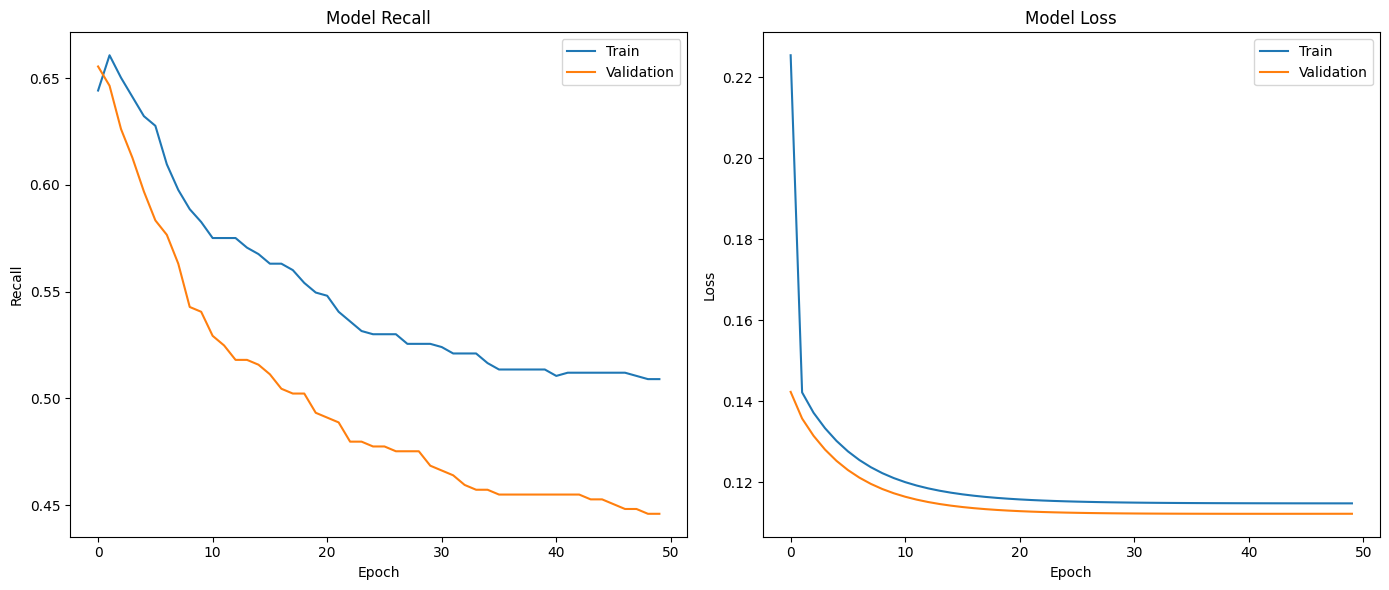

In [ ]:
plot_history(history,'recall','loss')

- We observe an unusual behavior where the model’s recall decreases as the number of epochs increases. This is likely due to the use of basic vanilla SGD without any hidden layers and without tuning the learning rate. Although the loss is decreasing over epochs, indicating some learning, the drop in recall suggests that the simple setup limits the model’s performance.

- Since the model has no hidden layers, its capacity is minimal (similar to logistic regression), making it hard to capture complex patterns in the data. The use of basic SGD, which can converge slowly and is sensitive to hyperparameters, further contributes to this behavior.

- There are signs of slight overfitting in recall (training recall higher than validation recall) and underfitting in loss (both training and validation losses are relatively high but close), but since this is a baseline model, overfitting and underfitting are not the main concern at this stage.

- To improve, we can try more advanced optimizers like Adam, tune learning rates, increase model complexity by adding hidden layers, and apply techniques for handling imbalanced data such as class weighting or resampling.

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


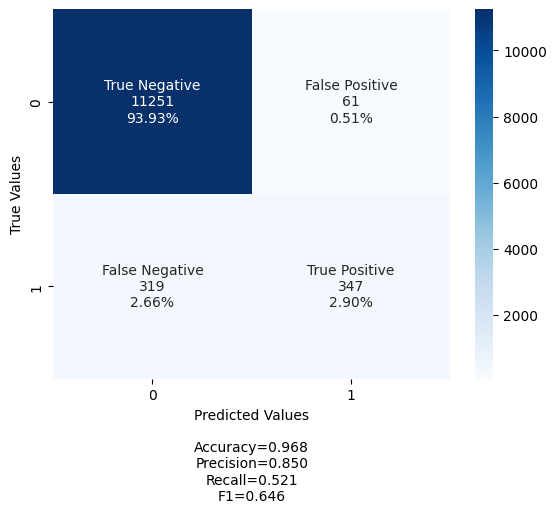

In [ ]:
## Confusion Matrix on unsee test set
y_pred1 = model.predict(x_train)
for i in range(len(y_train)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_train, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
#categories = [ 'Not_Fraud','Fraud']
plot_confusion_matrix(cm2,
                      group_Names=labels,
                      #categories=categories,
                      cmap='Blues')

- On the training data, we achieved a recall of only 0.521. Since recall is our primary metric, this indicates the model’s current ability to identify the minority (failure) class is limited. Due to the target imbalance, accuracy is not a meaningful metric here. Our precision is 0.85, meaning that when the model predicts failure, it is correct 85% of the time. The F1-score, which balances precision and recall and serves as our secondary metric, is relatively low at 0.646. For future models, our goal should be to prioritize improving recall first, followed by F1-score, and then precision.

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


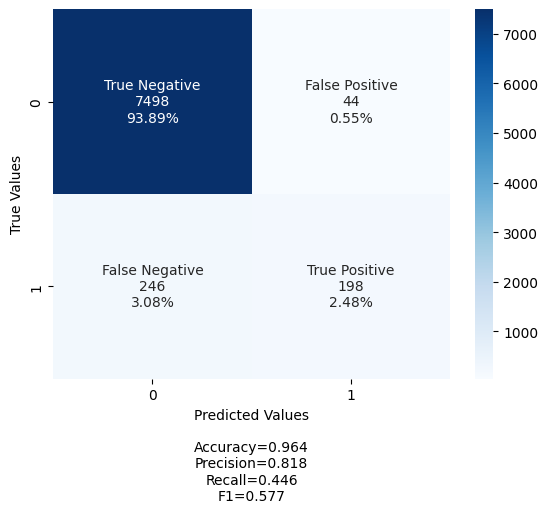

In [ ]:
## Confusion Matrix on unsee test set
y_pred1 = model.predict(x_val)
for i in range(len(y_val)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_val, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
#categories = [ 'Not_Fraud','Fraud']
plot_confusion_matrix(cm2,
                      group_Names=labels,
                      #categories=categories,
                      cmap='Blues')

- On validation data, the recall is 0.446, indicating the model still misses a significant number of actual failures, which is critical given our primary focus on recall. Although the accuracy is high at 0.964, it is not reliable due to class imbalance. Precision stands at 0.818, showing that most predicted failures are accurate. The F1-score is 0.577, reflecting a moderate balance between precision and recall. Future improvements should prioritize enhancing recall first, then F1-score, and finally precision to reduce costly undetected failures.

In [ ]:
results.loc[0]=[0,'-','-',50,32,'SGD','-','-','-',history.history['loss'][-1],history.history['val_loss'][-1],history.history['recall'][-1],history.history['val_recall'][-1],round(end-start,2)]
results

# hidden layers # neurons - hidden layer  \
0                0                        -   

  activation function - hidden layer   # epochs  batch size optimizer  \
0                                   -        50          32       SGD   

  learning rate, momentum weight initializer regularization  train loss  \
0                       -                  -              -    0.114841   

   validation loss  train recall  validation recall  time (secs)  
0         0.112274      0.509009           0.445946        107.9

- This baseline model with no hidden layers and a single neuron trained for 50 epochs using SGD achieves a training recall of about 51% and a validation recall of 44.6%. The training and validation losses are close (0.115 and 0.112), indicating no significant overfitting but rather underfitting due to the model’s simplicity. The moderate recall values suggest the model has limited ability to correctly identify positive (failure) cases, which is expected given the lack of hidden layers and the use of basic SGD optimizer. To improve recall and overall model performance, adding hidden layers, tuning optimizer parameters, or using advanced optimizers is recommended.

## **Model 1**

- Previously, our baseline model had no hidden layers; now, we are introducing a hidden layer with ReLU activation.

- We’ll use standard Gradient Descent as the optimizer with a learning rate of 0.001 and momentum set to 0.5.

- The model will be trained for 50 epochs, meaning it will iterate over the entire dataset 50 times.

- A batch size of 64 is applied, so the model updates its weights after processing every 64 samples.

In [ ]:
# Clears the current Keras session to free up memory and reset layer naming
tf.keras.backend.clear_session()
# Set seed for reproducibility across NumPy, Keras, and Python
keras.utils.set_random_seed(812)

# Enable deterministic GPU operations (may reduce performance)
tf.config.experimental.enable_op_determinism()

- Here, along with clearing the backend session, we are setting a random seed because I noticed some variations in results between runs. Using the random seed together with clearing the backend session helps ensure consistent, reproducible results every time we run the model.

In [ ]:
# Creating a sequential model
model1 = Sequential()

# Adding the first hidden layer with 128 neurons and ReLU activation
model1.add(Dense(128, activation='relu', input_dim=x_train.shape[1]))

# Adding the output layer with 1 neuron and sigmoid activation for binary classification
model1.add(Dense(1, activation='sigmoid'))

In [ ]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         5,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,377 (21.00 KB)

 Trainable params: 5,377 (21.00 KB)

 Non-trainable params: 0 (0.00 B)

- Model Type: Sequential

- Input Features: 40 (inferred from input_dim=x_train.shape[1])

- Layers:

 - Hidden Layer:

 - Type: Dense

 - Neurons: 128

 - Activation: ReLU

 - Parameters: 5,248
(Computed as: (40 input features + 1 bias) × 128 = 5,248)

- Output Layer:

 - Neurons: 1

 - Activation: Sigmoid

 - Parameters: 129
(Computed as: (128 hidden units + 1 bias) × 1 = 129)

- Total Trainable Parameters: 5,377 (≈21 KB)

- Non-trainable Parameters: 0

In [ ]:
# Setting training configuration
epochs = 50
batch_size = 64

# Using SGD optimizer with specified learning rate and momentum
optimizer = keras.optimizers.SGD(learning_rate=1e-4, momentum=0.5)

# Compiling the model
# - Binary Crossentropy is suitable for binary classification
# - Recall is used as the primary metric to catch as many failures (positives) as possible
model1.compile(
    loss='binary_crossentropy',
    optimizer=optimizer,
    metrics=['recall']
)

- Here, we introduced momentum to help the optimizer overcome local minima and reach the global minimum. We are currently using a momentum value of 0.5 to evaluate if the model’s performance improves. If needed, we can increase the momentum later.

- Regarding the learning rate, if the model shows signs of overfitting, we can either continue with the current learning rate or consider reducing it.

In [ ]:
# Tracking training time
start = time.time()

# Training the model
# - Fit the model on training data
# - Validate on validation data after each epoch
# - Use defined number of epochs and batch size
history = model1.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=epochs,
    batch_size=batch_size
)

# End time after training completes
end = time.time()


Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.3131 - recall: 0.2846 - val_loss: 0.2191 - val_recall: 0.2477
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2076 - recall: 0.2493 - val_loss: 0.1903 - val_recall: 0.2297
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1850 - recall: 0.2483 - val_loss: 0.1781 - val_recall: 0.2252
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1745 - recall: 0.2599 - val_loss: 0.1707 - val_recall: 0.2387
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1680 - recall: 0.2690 - val_loss: 0.1655 - val_recall: 0.2387
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1632 - recall: 0.2799 - val_loss: 0.1613 - val_recall: 0.2523
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1595 - recall: 0.2974 - val_loss: 0.1579 - val_recall: 0.2590
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1564 - recall: 0.3161 - val_loss: 0.1549 - val_recall: 0.2635
Epoch 9

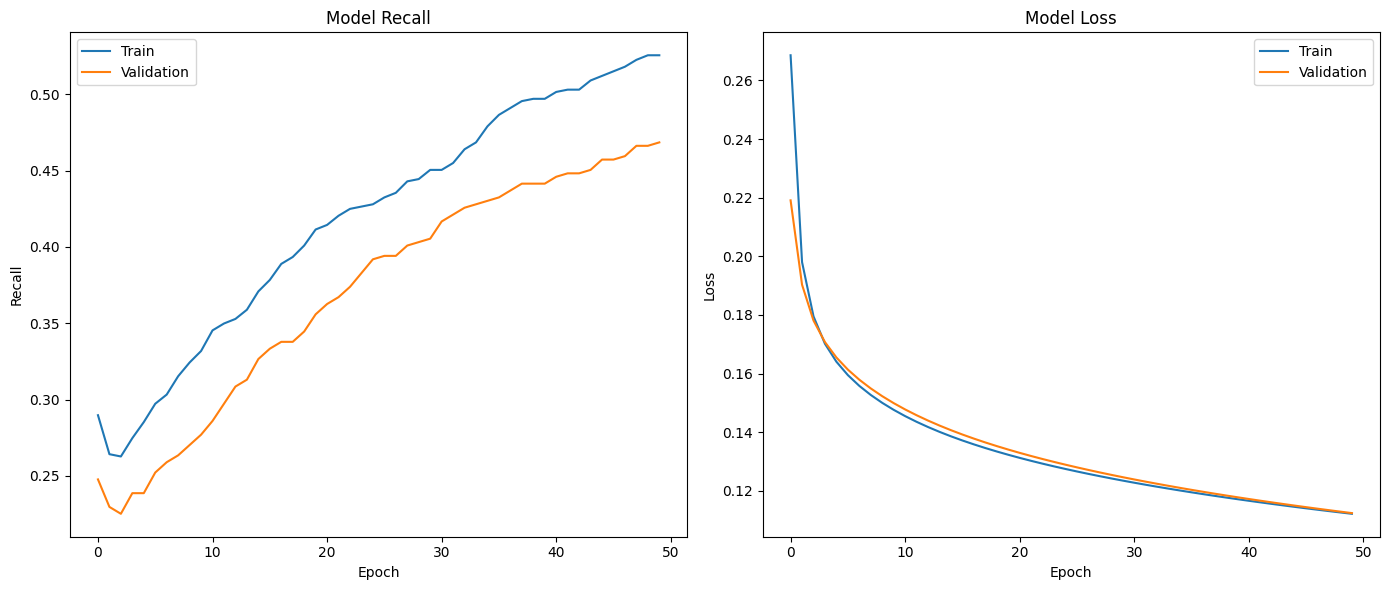

In [ ]:
# Plotting training and validation recall and loss over epochs
# - 'recall' and 'loss' are the metrics tracked during training
# - This helps in visually analyzing model performance and potential overfitting/underfitting
plot_history(history, 'recall', 'loss')

- From the above plot, unlike the baseline model where recall decreased as epochs increased, here we observe that recall steadily improves with training epochs. This suggests that the addition of a hidden layer and use of momentum are helping the model learn better.

- However, the final recall is still close to the baseline model, indicating there’s limited gain in terms of capturing the minority class.

- On the loss plot, we see the training and validation losses closely follow each other, which implies that the model is not overfitting at this stage.

- Overall, while model stability has improved, we still need to explore further enhancements—such as tuning learning rate, increasing model capacity, or applying class imbalance techniques—to significantly boost recall.

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


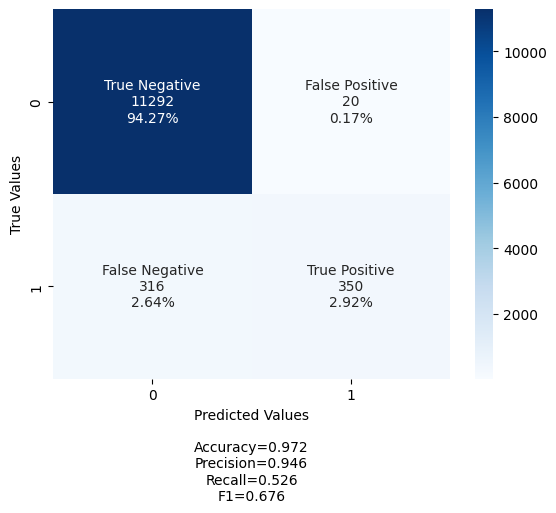

In [ ]:
## Confusion Matrix on unsee test set
y_pred1 = model1.predict(x_train)
for i in range(len(y_train)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_train, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
#categories = [ 'Not_Fraud','Fraud']
plot_confusion_matrix(cm2,
                      group_Names=labels,
                      #categories=categories,
                      cmap='Blues')

- Compared to the baseline training data, we observe a notable improvement in precision—from 0.85 to 0.94—which is a positive sign, especially since precision helps reduce false positives and unnecessary inspections.

- While this improvement is encouraging, the gains in other key metrics like recall and F1-score are relatively minor.

- Since recall remains our primary metric due to the high cost of missed failures, future improvements should focus more on enhancing recall while maintaining or balancing precision.

- This version of the model shows potential, but further tuning—such as adding more layers, using class weights, or trying different optimizers—will be important to drive meaningful improvements in our most critical metrics.

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


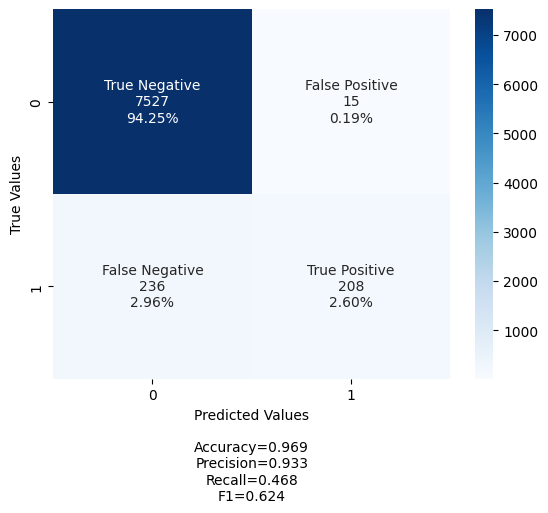

In [ ]:
## Confusion Matrix on unsee test set
y_pred1 = model1.predict(x_val)
for i in range(len(y_val)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_val, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
#categories = [ 'Not_Fraud','Fraud']
plot_confusion_matrix(cm2,
                      group_Names=labels,
                      #categories=categories,
                      cmap='Blues')

- On the validation side, we observe an improvement in recall compared to the baseline model—rising from 0.44 to 0.46. While this is a marginal gain, it indicates the model is slightly better at identifying actual failures.

- However, when compared to the training recall (0.52), there remains a noticeable gap, suggesting the model is still underperforming on unseen data.

- This gap may be addressed by applying class weighting or resampling techniques to better handle the class imbalance.

- Precision is strong at 0.933, indicating that most predicted failures are indeed correct, which helps reduce false alarms and unnecessary inspections.

- F1-score, which balances recall and precision, also needs to be improved further to ensure overall robustness.

- In summary, while the model shows incremental progress, especially in validation recall and precision, more targeted strategies are needed to boost recall and close the performance gap between training and validation sets.

In [ ]:
results.loc[1]=[1,[128],'relu',50,64,'SGD',[0.0001,0.5],'-','-',history.history['loss'][-1],history.history['val_loss'][-1],history.history['recall'][-1],history.history['val_recall'][-1],round(end-start,2)]
results

# hidden layers # neurons - hidden layer  \
0                0                        -   
1                1                    [128]   

  activation function - hidden layer   # epochs  batch size optimizer  \
0                                   -        50          32       SGD   
1                                relu        50          64       SGD   

  learning rate, momentum weight initializer regularization  train loss  \
0                       -                  -              -    0.114841   
1           [0.0001, 0.5]                  -              -    0.112165   

   validation loss  train recall  validation recall  time (secs)  
0         0.112274      0.509009           0.445946       107.90  
1         0.112403      0.525526           0.468468        67.89

- Model 1 (Baseline - No Hidden Layer):

 - This simple logistic regression–like setup achieved a training recall of 0.509 and a validation recall of 0.446, with a training loss of 0.1148.

 - The validation performance shows early signs of underfitting due to the model’s limited capacity and lack of non-linearity.

- Model 2 (1 Hidden Layer with 128 Neurons, ReLU Activation):

 - With the addition of a hidden layer and use of SGD (lr=0.001, momentum=0.5), the model's training recall improved slightly to 0.526, and validation recall increased to 0.468.

 - Although the improvement in recall is moderate, it is meaningful—especially in a failure detection scenario where recall is critical.

 - The training and validation losses are nearly the same (0.1122 vs. 0.1124), indicating minimal overfitting.

 - Training time also decreased significantly (109.88s → 66.32s) due to a larger batch size and potentially better learning dynamics.

## **Model 2**

- In the third model, we introduce an additional hidden layer using the Tanh activation function. We continue using the SGD optimizer, but increase the momentum from 0.5 to 0.9 to help the model move more effectively through the loss surface and escape local minima.

- Additionally, we reduce the batch size from 64 to 32, allowing the model to update weights more frequently, which can improve learning dynamics—especially useful when working with complex or imbalanced datasets.

In [ ]:
# Clears the current Keras session to free up memory and reset layer naming
tf.keras.backend.clear_session()
# Set seed for reproducibility across NumPy, Keras, and Python
keras.utils.set_random_seed(812)

# Enable deterministic GPU operations (may reduce performance)
tf.config.experimental.enable_op_determinism()

- Here, along with clearing the backend session, we are setting a random seed because I noticed some variations in results between runs. Using the random seed together with clearing the backend session helps ensure consistent, reproducible results every time we run the model.

In [ ]:
# Define model2 as a Sequential neural network
model2 = Sequential()

# Add first hidden layer with 128 neurons and ReLU activation
model2.add(Dense(128, activation='relu', input_dim=x_train.shape[1]))

# Add second hidden layer with 64 neurons and tanh activation
model2.add(Dense(64, activation='tanh'))

# Add output layer with 1 neuron and sigmoid activation for binary classification
model2.add(Dense(1, activation='sigmoid'))

In [ ]:
# Display the architecture summary of model2
model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         5,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,569 (53.00 KB)

 Trainable params: 13,569 (53.00 KB)

 Non-trainable params: 0 (0.00 B)

- Input Layer to First Hidden Layer:

 - Dense layer with 128 neurons, likely using ReLU or Tanh.

 - Parameters = (input_dim × 128) + 128 = 5,248.

 - First to Second Hidden Layer:

 - Dense layer with 64 neurons.

 - Parameters = (128 × 64) + 64 = 8,256.

- Second Hidden to Output Layer:

 - Dense layer with 1 neuron and sigmoid activation for binary classification.

 - Parameters = (64 × 1) + 1 = 65.

In [ ]:
# Set training parameters
epochs = 50
batch_size = 32

# Initialize SGD optimizer with learning rate and momentum
optimizer = keras.optimizers.SGD(learning_rate=1e-4, momentum=0.9)

# Compile the model with binary crossentropy loss and recall metric
model2.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['recall'])

- In the previous setup, we used a momentum of 0.5. Here, we've increased it to 0.9, which helps the model maintain direction during training, avoid getting stuck in local minima, and achieve more stable convergence toward the global minimum.

- We've also reduced the batch size from 64 to 32. A smaller batch size results in more frequent weight updates, which can lead to faster learning dynamics and may improve the model's ability to generalize, especially on smaller or imbalanced datasets.

- These changes—higher momentum and smaller batch size—are particularly helpful when the model becomes deeper, as they support better gradient flow and faster convergence during training.

In [ ]:
# Start timing the training process
start = time.time()

# Train the model with training data and validate on validation data
history = model2.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=epochs, batch_size=batch_size)

# End timing after training completes
end = time.time()

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.4788 - recall: 0.4208 - val_loss: 0.1691 - val_recall: 0.1239
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1619 - recall: 0.1401 - val_loss: 0.1495 - val_recall: 0.1441
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1464 - recall: 0.1783 - val_loss: 0.1386 - val_recall: 0.1959
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1369 - recall: 0.2441 - val_loss: 0.1302 - val_recall: 0.2432
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1294 - recall: 0.3050 - val_loss: 0.1233 - val_recall: 0.2995
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1233 - recall: 0.3418 - val_loss: 0.1174 - val_recall: 0.3356
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.1181 - recall: 0.3638 - val_loss: 0.1123 - val_recall: 0.3604
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.1136 - recall: 0.4009 - val_loss: 0.1078 - val_recall: 0.3874
Epoch 9/

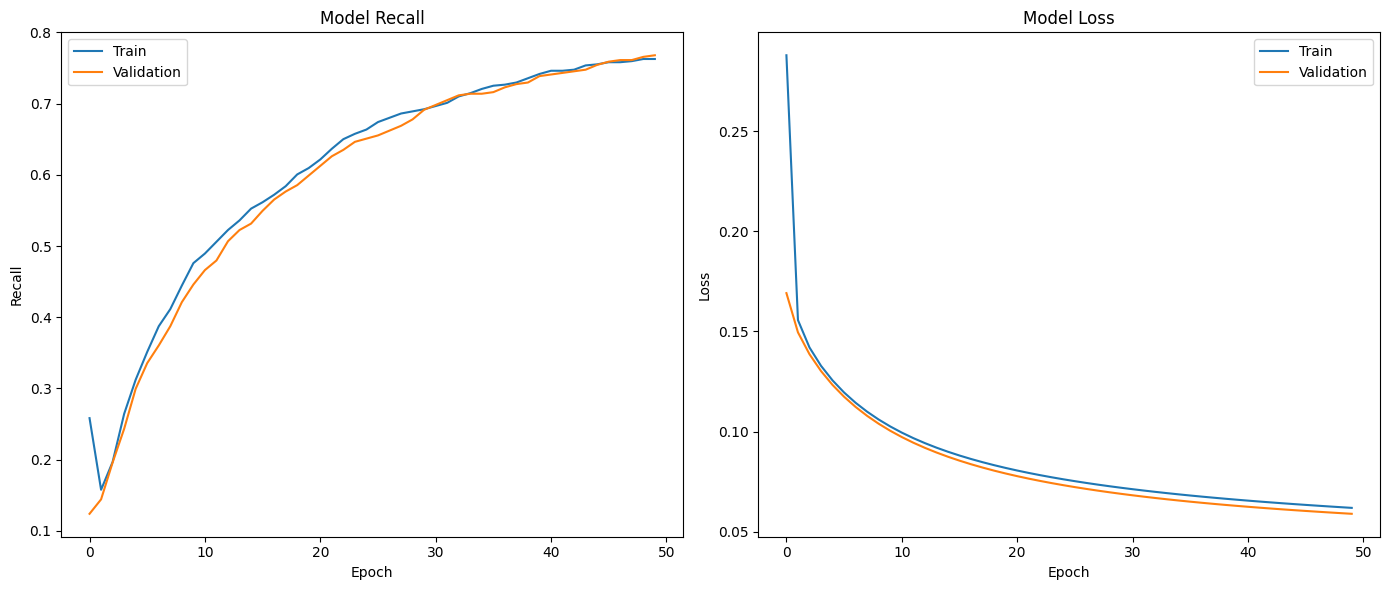

In [ ]:
# Plotting training and validation recall and loss over epochs
# - 'recall' and 'loss' are the metrics tracked during training
# - This helps in visually analyzing model performance and potential overfitting/underfitting
plot_history(history, 'recall', 'loss')

- As discussed, increasing the number of layers and momentum, along with reducing the batch size, has contributed to an improvement in the model’s recall and a reduction in loss. These changes have enhanced the model’s learning capacity and stability during training.

- In the above plot, we observe that the validation recall is slightly higher than the training recall, while the validation loss is slightly lower than the training loss. This may indicate that the model is generalizing well and not overfitting.

- To further boost performance, we can introduce techniques such as callbacks (e.g., EarlyStopping or ModelCheckpoint), Dropout (to prevent overfitting), and Batch Normalization (to stabilize and accelerate training).

- Most importantly, incorporating class weights will directly address the class imbalance, allowing the model to focus more on the minority (failure) class and potentially deliver a substantial increase in recall and F1-score, which are our key performance metrics.

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


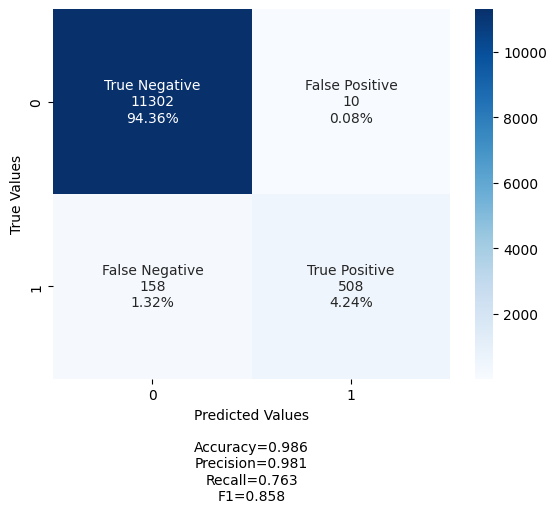

In [ ]:
## Confusion Matrix on unsee test set
y_pred1 = model2.predict(x_train)
for i in range(len(y_train)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_train, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
#categories = [ 'Not_Fraud','Fraud']
plot_confusion_matrix(cm2,
                      group_Names=labels,
                      #categories=categories,
                      cmap='Blues')

- In the training confusion matrix, we observe a significant improvement in recall, increasing from 0.526 to 0.763. Additionally, the F1 score has risen from 0.67 to 0.85, which is a very positive indicator of balanced precision and recall. Our precision is also high at 0.98, showing the model is making very few false positives. For further enhancement, fine-tuning the model’s hyperparameters and applying techniques like class weighting or dropout could help achieve even better and more robust results.

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


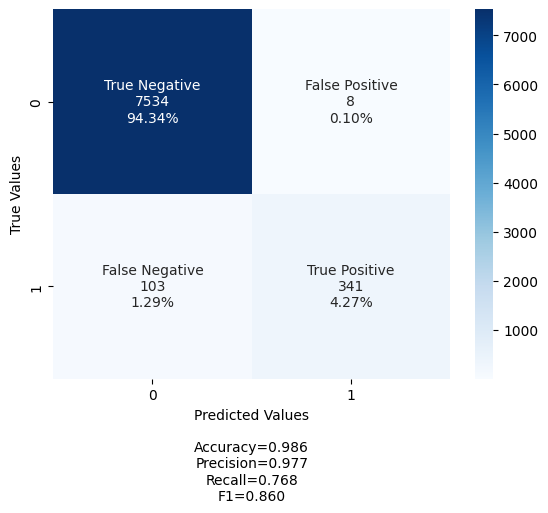

In [ ]:
## Confusion Matrix on unsee test set
y_pred1 = model2.predict(x_val)
for i in range(len(y_val)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_val, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
#categories = [ 'Not_Fraud','Fraud']
plot_confusion_matrix(cm2,
                      group_Names=labels,
                      #categories=categories,
                      cmap='Blues')

- Validation recall (0.768) is slightly higher than training recall (0.763), which is a positive sign.

- F1 score shows a minor improvement on validation (0.860) compared to training (0.858).

- Accuracy remains consistent between training and validation datasets.

- Precision drops slightly from training (0.981) to validation (0.977), which is expected as the model generalizes.

- These metrics indicate the model is not overfitting and generalizes well to unseen data.

- The close performance between training and validation suggests good model stability.

- Further tuning and regularization could help close the small gaps and improve overall robustness.

In [ ]:
results.loc[2]=[2,[128,64],['relu','tanh'],50,32,'SGD',[0.0001,0.9],'-','-',history.history['loss'][-1],history.history['val_loss'][-1],history.history['recall'][-1],history.history['val_recall'][-1],round(end-start,2)]
results

# hidden layers # neurons - hidden layer  \
0                0                        -   
1                1                    [128]   
2                2                [128, 64]   

  activation function - hidden layer   # epochs  batch size optimizer  \
0                                   -        50          32       SGD   
1                                relu        50          64       SGD   
2                        [relu, tanh]        50          32       SGD   

  learning rate, momentum weight initializer regularization  train loss  \
0                       -                  -              -    0.114841   
1           [0.0001, 0.5]                  -              -    0.112165   
2           [0.0001, 0.9]                  -              -    0.061903   

   validation loss  train recall  validation recall  time (secs)  
0         0.112274      0.509009           0.445946       107.90  
1         0.112403      0.525526           0.468468        67.89  
2         0.058945      0.762763           0.768018       110.33

- Compared to the previous models, the third model takes slightly more training time, likely due to the addition of an extra hidden layer and the reduced batch size, which leads to more frequent weight updates.

- Despite the increased training time, there is a significant improvement in both training and validation loss, which have decreased substantially.

- Recall has improved notably from around 0.52 in earlier models to approximately 0.76 on training and 0.77 on validation, indicating better sensitivity in detecting positive cases.

- These improvements suggest the model is learning better representations and generalizing well on validation data.

- For further enhancement, introducing techniques like callbacks, dropout, batch normalization, and class weighting could help reduce loss even more and improve overall robustness.

- Monitoring training time is important as increasing model complexity can lead to diminishing returns if training becomes too slow.

## **Model 3**

- In this model, we will keep all parameters and settings the same as the previous model but introduce class weights to address class imbalance and improve recall. Using class weights helps the model pay more attention to the minority class, potentially boosting recall, although it may affect other metrics like precision. This approach allows us to better capture positive cases without altering the dataset itself.

In [ ]:
# Clears the current Keras session to free up memory and reset layer naming
tf.keras.backend.clear_session()
# Set seed for reproducibility across NumPy, Keras, and Python
keras.utils.set_random_seed(812)

# Enable deterministic GPU operations (may reduce performance)
tf.config.experimental.enable_op_determinism()

- Here, along with clearing the backend session, we are setting a random seed because I noticed some variations in results between runs. Using the random seed together with clearing the backend session helps ensure consistent, reproducible results every time we run the model.

In [ ]:
weights = class_weight.compute_class_weight(class_weight = "balanced",classes = np.unique(y_train), y = y_train)
class_weights = dict(enumerate(weights))
class_weights

{0: np.float64(0.5294377652050919), 1: np.float64(8.992492492492492)}

- Here, we have calculated the updated class weights to handle the class imbalance. The weights show that class 0 is given much less importance compared to class 1, reflecting the imbalance in the dataset.

In [ ]:
# Define model2 as a Sequential neural network
model3 = Sequential()

# Add first hidden layer with 128 neurons and ReLU activation
model3.add(Dense(128, activation='relu', input_dim=x_train.shape[1]))

# Add second hidden layer with 64 neurons and tanh activation
model3.add(Dense(64, activation='tanh'))

# Add output layer with 1 neuron and sigmoid activation for binary classification
model3.add(Dense(1, activation='sigmoid'))

In [ ]:
# Display the architecture summary of model2
model3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         5,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,569 (53.00 KB)

 Trainable params: 13,569 (53.00 KB)

 Non-trainable params: 0 (0.00 B)

- Input Layer to First Hidden Layer:

 - Dense layer with 128 neurons, likely using ReLU or Tanh.

 - Parameters = (input_dim × 128) + 128 = 5,248.

 - First to Second Hidden Layer:

 - Dense layer with 64 neurons.

 - Parameters = (128 × 64) + 64 = 8,256.

- Second Hidden to Output Layer:

 - Dense layer with 1 neuron and sigmoid activation for binary classification.

 - Parameters = (64 × 1) + 1 = 65.

In [ ]:
# Set training parameters
epochs = 50
batch_size = 32

# Initialize SGD optimizer with learning rate and momentum
optimizer = keras.optimizers.SGD(learning_rate=1e-4, momentum=0.9)

# Compile the model with binary crossentropy loss and recall metric
model3.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['recall'])

- In the previous setup, we used a momentum of 0.5. Here, we've increased it to 0.9, which helps the model maintain direction during training, avoid getting stuck in local minima, and achieve more stable convergence toward the global minimum.

- We've also reduced the batch size from 64 to 32. A smaller batch size results in more frequent weight updates, which can lead to faster learning dynamics and may improve the model's ability to generalize, especially on smaller or imbalanced datasets.

- These changes—higher momentum and smaller batch size—are particularly helpful when the model becomes deeper, as they support better gradient flow and faster convergence during training.

In [ ]:
# Start timing the training process
start = time.time()

# Train the model with training data and validate on validation data
history = model3.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=epochs, batch_size=batch_size,class_weight=class_weights)

# End timing after training completes
end = time.time()

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.6425 - recall: 0.7343 - val_loss: 0.3964 - val_recall: 0.8153
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.4077 - recall: 0.8287 - val_loss: 0.3302 - val_recall: 0.8806
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3568 - recall: 0.8493 - val_loss: 0.2930 - val_recall: 0.8896
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.3291 - recall: 0.8631 - val_loss: 0.2678 - val_recall: 0.9122
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.3103 - recall: 0.8786 - val_loss: 0.2492 - val_recall: 0.9234
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.2961 - recall: 0.8787 - val_loss: 0.2348 - val_recall: 0.9212
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2846 - recall: 0.8823 - val_loss: 0.2233 - val_recall: 0.9234
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.2751 - recall: 0.8879 - val_loss: 0.2139 - val_recall: 0.9212
Epoch 9/

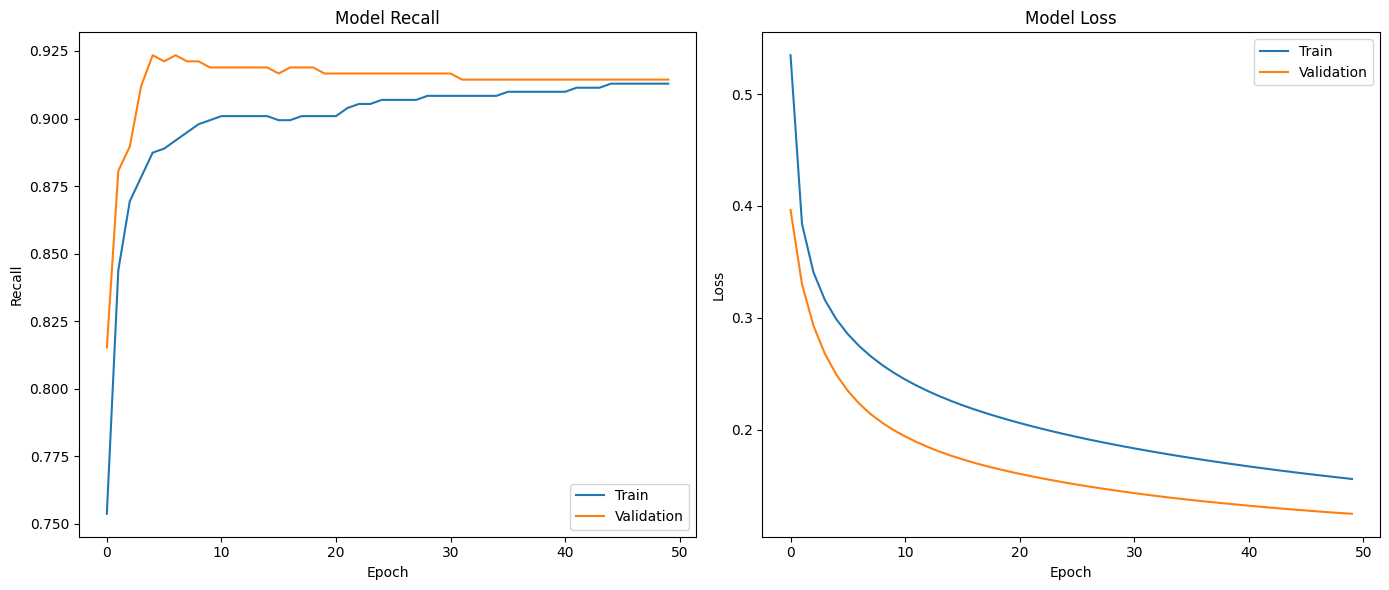

In [ ]:
# Plotting training and validation recall and loss over epochs
# - 'recall' and 'loss' are the metrics tracked during training
# - This helps in visually analyzing model performance and potential overfitting/underfitting
plot_history(history, 'recall', 'loss')

- Here, we observe that the validation recall starts off slightly higher than in the later epochs, but by the final epoch, it is marginally better than the training recall.

- Comparing the loss plots before and after introducing class weights, there is a noticeable reduction in loss, indicating improved model learning.

- Although the loss improvement may seem subtle, the overall recall has significantly increased, showing that the model is better at identifying positive cases in the imbalanced dataset.

- This demonstrates that using class weights effectively helps the model focus more on minority classes, improving recall without drastically harming loss performance.

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


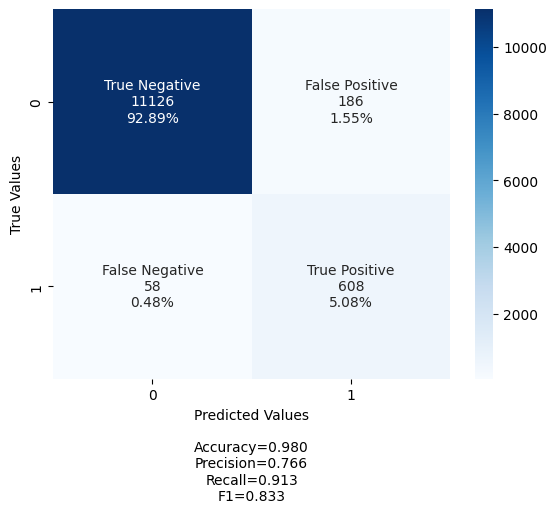

In [ ]:
## Confusion Matrix on unsee test set
y_pred1 = model3.predict(x_train)
for i in range(len(y_train)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_train, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
#categories = [ 'Not_Fraud','Fraud']
plot_confusion_matrix(cm2,
                      group_Names=labels,
                      #categories=categories,
                      cmap='Blues')

- In the training confusion matrix, we observe a significant improvement in recall from 0.76 to 0.91; however, this comes at the cost of a drastic drop in precision from 0.98 to 0.76.

- Such a trade-off indicates that while the model is better at capturing positive cases, it is also producing more false positives.

- To address this imbalance, further enhancements like switching to the Adam optimizer could help stabilize precision without sacrificing recall.

- Additionally, it’s important to note that except for recall, most other performance metrics have declined, suggesting the need for careful tuning to achieve a better overall balance.

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


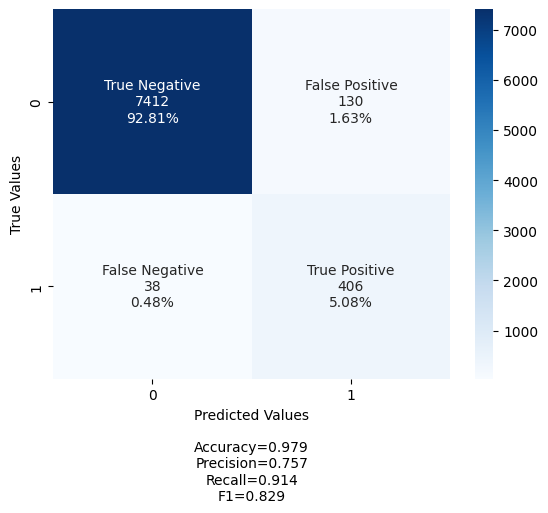

In [ ]:
## Confusion Matrix on unsee test set
y_pred1 = model3.predict(x_val)
for i in range(len(y_val)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_val, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
#categories = [ 'Not_Fraud','Fraud']
plot_confusion_matrix(cm2,
                      group_Names=labels,
                      #categories=categories,
                      cmap='Blues')

- In the validation confusion matrix, except for recall, all other metrics are slightly lower than those in the training data. Even recall is very close, with validation at 0.914 and training at 0.912.

- This small difference suggests that the model is well-generalized and not overfitting.

- However, we still need to focus on improving precision and F1-score, which remain notably affected even after applying class weights.

- Despite this, the overall accuracy remains strong, indicating a good balance, but further tuning could help enhance the precision and F1 without compromising recall.

In [ ]:
results.loc[3]=[2,[128,64],['relu','tanh'],50,32,'SGD',[0.0001,0.9],'-','-',history.history['loss'][-1],history.history['val_loss'][-1],history.history['recall'][-1],history.history['val_recall'][-1],round(end-start,2)]
results

# hidden layers # neurons - hidden layer  \
0                0                        -   
1                1                    [128]   
2                2                [128, 64]   
3                2                [128, 64]   

  activation function - hidden layer   # epochs  batch size optimizer  \
0                                   -        50          32       SGD   
1                                relu        50          64       SGD   
2                        [relu, tanh]        50          32       SGD   
3                        [relu, tanh]        50          32       SGD   

  learning rate, momentum weight initializer regularization  train loss  \
0                       -                  -              -    0.114841   
1           [0.0001, 0.5]                  -              -    0.112165   
2           [0.0001, 0.9]                  -              -    0.061903   
3           [0.0001, 0.9]                  -              -    0.155998   

   validation loss  train recall  validation recall  time (secs)  
0         0.112274      0.509009           0.445946       107.90  
1         0.112403      0.525526           0.468468        67.89  
2         0.058945      0.762763           0.768018       110.33  
3         0.124859      0.912913           0.914414       130.36

- Introducing class weights in the latest model (row 3) significantly improved recall, achieving around 0.91 on both training and validation sets, which is better than all previous models. However, this improvement came with an increase in loss and a drop in precision. The training and validation losses are higher compared to the previous model without class weights, indicating the model might be struggling to balance overall performance.

- Moving forward, the focus should be on refining the model to reduce the loss and improve precision without sacrificing the recall gains. This could involve tuning hyperparameters, experimenting with different optimizers, regularization techniques, or adjusting the class weights further to achieve a better trade-off among all metrics.

## **Model 4**

- In this model, we introduce the Adam optimizer with its default learning rate. Additionally, we add one more hidden layer with 32 neurons and use the 'tanh' activation function. This setup aims to improve the model's learning capability and better capture non-linear patterns.

In [ ]:
# Clears the current Keras session to free up memory and reset layer naming
tf.keras.backend.clear_session()
# Set seed for reproducibility across NumPy, Keras, and Python
keras.utils.set_random_seed(812)

# Enable deterministic GPU operations (may reduce performance)
tf.config.experimental.enable_op_determinism()

- Here, along with clearing the backend session, we are setting a random seed because I noticed some variations in results between runs. Using the random seed together with clearing the backend session helps ensure consistent, reproducible results every time we run the model.

In [ ]:
# Define a sequential model
model4 = Sequential()

# Add the input layer with 128 neurons and ReLU activation
model4.add(Dense(128, activation='relu', input_dim=x_train.shape[1]))

# Add a hidden layer with 64 neurons and tanh activation
model4.add(Dense(64, activation='tanh'))

# Add another hidden layer with 32 neurons and tanh activation
model4.add(Dense(32, activation='tanh'))

# Add the output layer with 1 neuron and sigmoid activation for binary classification
model4.add(Dense(1, activation='sigmoid'))

In [ ]:
# Display a summary of the model architecture: layers, shapes, and number of parameters
model4.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         5,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,617 (61.00 KB)

 Trainable params: 15,617 (61.00 KB)

 Non-trainable params: 0 (0.00 B)

- The model is a fully connected feedforward neural network (Sequential).

- Input layer → 3 hidden layers → 1 output layer, suitable for binary classification (because of sigmoid at the end).

- Layer breakdown:

 - Dense(128): Input layer with 128 neurons, ReLU activation.

 - Dense(64): First hidden layer with 64 neurons, tanh activation.

 - Dense(32): Second hidden layer with 32 neurons, tanh activation.

 - Dense(1): Output layer with 1 neuron, sigmoid activation.

- Total trainable parameters: 15,617 (≈61 KB):

 - This is a moderate-sized model, appropriate for many small to medium-sized datasets.

 - All parameters are trainable — no frozen layers.

- No convolution, dropout, or batch normalization used — it’s a pure dense feedforward architecture.



In [ ]:
# Set the number of epochs (complete passes through the training data)
epochs = 50

# Set the batch size (number of samples processed before the model is updated)
batch_size = 32

# Compile the model with:
# - Binary crossentropy loss function for binary classification
# - Adam optimizer for adaptive learning rate and efficient convergence
# - Recall as the evaluation metric to focus on correctly identifying positive class
model4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['recall'])

- Adam adapts the learning rate for each parameter individually, which often leads to faster and more stable convergence compared to vanilla SGD or SGD with momentum.

- Because Adam handles both momentum and adaptive learning rates internally, it usually requires less hyperparameter tuning, making it a good default optimizer for many problems.

- However, while Adam works well in most cases, sometimes fine-tuning the learning rate or switching to other optimizers (like RMSProp or SGD with momentum) might improve performance depending on the specific dataset or problem.

- Adam’s adaptive nature helps especially when training with sparse gradients or noisy data.

- It’s a widely used optimizer in deep learning frameworks due to its robustness and efficiency.

In [ ]:
# Record the start time before training begins
start = time.time()

# Train the model on the training data (x_train, y_train)
# Validate the model on the validation data (x_val, y_val) after each epoch
# - epochs: number of complete passes through the training dataset
# - batch_size: number of samples processed before updating the model
# - class_weight: dictionary specifying weights for each class to handle class imbalance
history = model4.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=epochs,
    batch_size=batch_size,
    class_weight=class_weights
)

# Record the end time after training completes
end = time.time()

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.3919 - recall: 0.7694 - val_loss: 0.1812 - val_recall: 0.9167
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2233 - recall: 0.8913 - val_loss: 0.1614 - val_recall: 0.9167
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1954 - recall: 0.8983 - val_loss: 0.1516 - val_recall: 0.9167
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1814 - recall: 0.8973 - val_loss: 0.1474 - val_recall: 0.9167
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1716 - recall: 0.9043 - val_loss: 0.1342 - val_recall: 0.9144
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1599 - recall: 0.9089 - val_loss: 0.1382 - val_recall: 0.9144
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1506 - recall: 0.9152 - val_loss: 0.1265 - val_recall: 0.9144
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1509 - recall: 0.9132 - val_loss: 0.1500 - val_recall: 0.9144
Epoch 9/

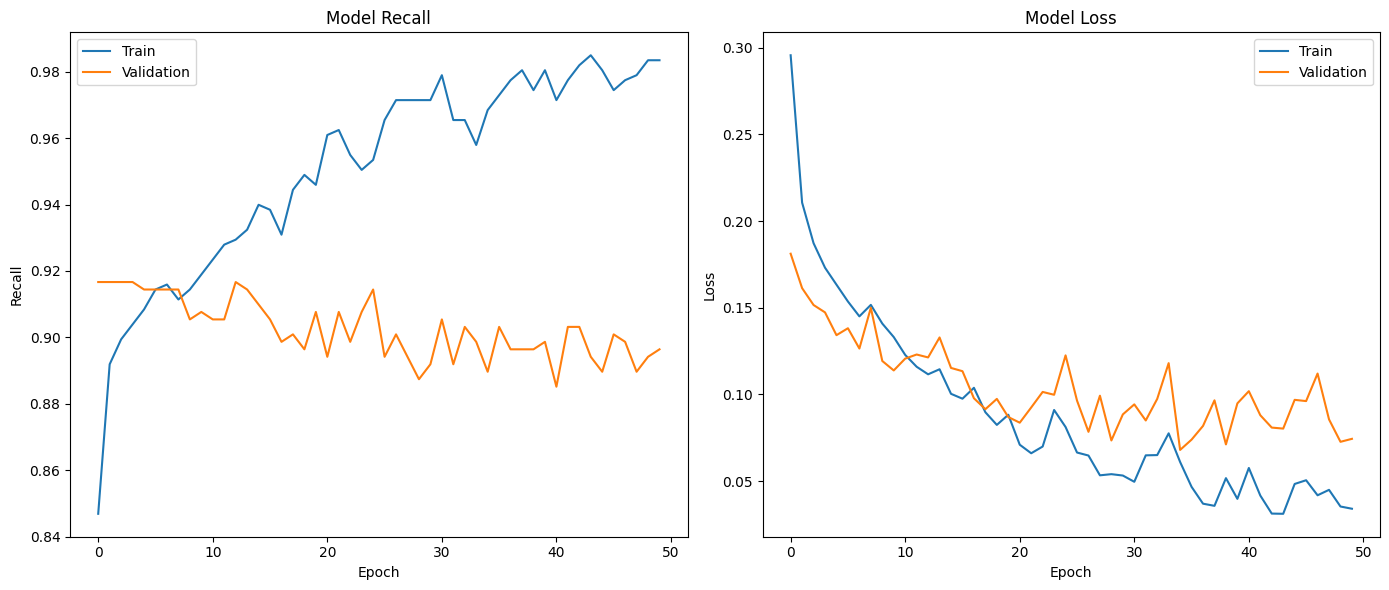

In [ ]:
# Plotting training and validation recall and loss over epochs
# - 'recall' and 'loss' are the metrics tracked during training
# - This helps in visually analyzing model performance and potential overfitting/underfitting
plot_history(history, 'recall', 'loss')

- Here, we observe that the training curve is not smooth, which is somewhat unusual because the Adam optimizer typically produces smoother learning curves due to its adaptive learning rate and momentum handling. The irregularity might be caused by additional layers or architectural complexity that introduce more fluctuations during training.

- More importantly, the model is showing signs of overfitting — the training loss is low, but the validation loss remains significantly higher. This gap indicates that the model is learning the training data too well, including noise or specific patterns that do not generalize to unseen data. To address this, techniques such as adding regularization (like dropout or weight decay), reducing model complexity, or using early stopping could help improve generalization.

- Additionally, there is a noticeable difference between the training and validation recall metrics: training recall is very high (around 0.98), while validation recall is lower (around 0.91). This further confirms that the model performs better on training data but struggles to maintain the same level of positive class identification on unseen data.

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


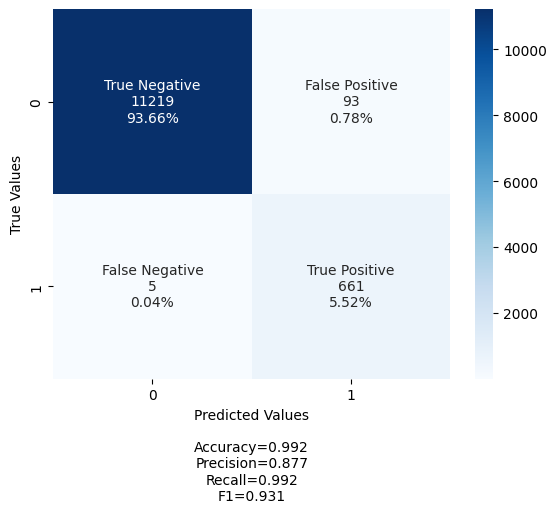

In [ ]:
## Confusion Matrix on unsee test set
y_pred1 = model4.predict(x_train)
for i in range(len(y_train)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_train, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
#categories = [ 'Not_Fraud','Fraud']
plot_confusion_matrix(cm2,
                      group_Names=labels,
                      #categories=categories,
                      cmap='Blues')

- Here, the training confusion matrix shows very promising results: recall and accuracy are both nearly 0.99, and the F1 score has improved to 0.931, marking a significant enhancement over the previous model. Precision has also improved compared to before, though it remains slightly lower relative to the other metrics in this model. The introduction of the Adam optimizer has clearly helped maintain strong performance across all metrics, contributing to more stable and effective training.

- This suggests that while the model is excellent at identifying positive cases (high recall) and overall correctness (high accuracy), there is still some room to improve precision, which means reducing false positives. Fine-tuning thresholds or experimenting with class weights further could help balance precision with recall better.

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


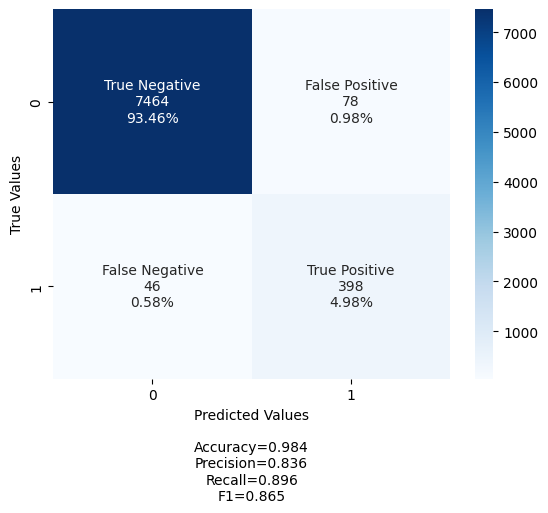

In [ ]:
## Confusion Matrix on unsee test set
y_pred1 = model4.predict(x_val)
for i in range(len(y_val)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_val, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
#categories = [ 'Not_Fraud','Fraud']
plot_confusion_matrix(cm2,
                      group_Names=labels,
                      #categories=categories,
                      cmap='Blues')

- In the validation confusion matrix, we observe an improvement in the F1 score compared to the previous model. However, a key concern is that all the performance metrics on the training data are significantly higher than those on the validation set. This discrepancy indicates that the model is not generalizing well and is likely overfitting by memorizing noise or specific patterns in the training data.

- To address this, we should consider introducing regularization techniques such as dropout and batch normalization to improve generalization. Additionally, reducing the number of layers or model complexity can help prevent overfitting by limiting the model’s capacity to memorize the training data. These steps are essential to ensure the model performs robustly on unseen data.

In [ ]:
results.loc[4]=[3,[128,64,32],['relu','tanh','tanh'],50,32,'ADAM','-','-','-',history.history['loss'][-1],history.history['val_loss'][-1],history.history['recall'][-1],history.history['val_recall'][-1],round(end-start,2)]
results

# hidden layers # neurons - hidden layer  \
0                0                        -   
1                1                    [128]   
2                2                [128, 64]   
3                2                [128, 64]   
4                3            [128, 64, 32]   

  activation function - hidden layer   # epochs  batch size optimizer  \
0                                   -        50          32       SGD   
1                                relu        50          64       SGD   
2                        [relu, tanh]        50          32       SGD   
3                        [relu, tanh]        50          32       SGD   
4                  [relu, tanh, tanh]        50          32      ADAM   

  learning rate, momentum weight initializer regularization  train loss  \
0                       -                  -              -    0.114841   
1           [0.0001, 0.5]                  -              -    0.112165   
2           [0.0001, 0.9]                  -              -    0.061903   
3           [0.0001, 0.9]                  -              -    0.155998   
4                       -                  -              -    0.034089   

   validation loss  train recall  validation recall  time (secs)  
0         0.112274      0.509009           0.445946       107.90  
1         0.112403      0.525526           0.468468        67.89  
2         0.058945      0.762763           0.768018       110.33  
3         0.124859      0.912913           0.914414       130.36  
4         0.074413      0.983483           0.896396       132.00

- Across all previous models, the highest recall on the training set was achieved only in Model 4. However, the best recall score on the validation set was observed in Model 3. Since validation performance better reflects how the model will perform on unseen data, it should be our primary focus and goal.

- This indicates that while Model 4 fits the training data very well, it may be overfitting and not generalizing as effectively as Model 3. Therefore, moving forward, we need to prioritize improvements that enhance validation performance, such as applying regularization, tuning hyperparameters, or simplifying the model to prevent overfitting.

## **Model 5**

- In this model, we introduce Dropout to help prevent overfitting and improve generalization.

- Additionally, we set the learning rate to 0.001 for the Adam optimizer, which balances convergence speed and stability.

- Together, these changes aim to enhance the model's performance and robustness on unseen data.

In [ ]:
# Clears the current Keras session to free up memory and reset layer naming
tf.keras.backend.clear_session()
# Set seed for reproducibility across NumPy, Keras, and Python
keras.utils.set_random_seed(812)

# Enable deterministic GPU operations (may reduce performance)
tf.config.experimental.enable_op_determinism()

- Here, along with clearing the backend session, we are setting a random seed because I noticed some variations in results between runs. Using the random seed together with clearing the backend session helps ensure consistent, reproducible results every time we run the model.

In [ ]:
# Initialize a sequential model
model5 = Sequential()

# First hidden layer:
# - 128 neurons
# - ReLU activation for fast and sparse learning
# - Input dimension equals number of features in the training data
model5.add(Dense(128, activation='relu', input_dim=x_train.shape[1]))

# Dropout layer:
# - Randomly drops 30% of neurons during training to prevent overfitting
model5.add(Dropout(0.3))

# Second hidden layer:
# - 64 neurons
# - Tanh activation for bounded output between -1 and 1
model5.add(Dense(64, activation='tanh'))

# Dropout layer:
# - Again drops 30% of neurons to improve generalization
model5.add(Dropout(0.3))

# Output layer:
# - 1 neuron
# - Sigmoid activation for binary classification (outputs probability between 0 and 1)
model5.add(Dense(1, activation='sigmoid'))


In [ ]:
model5.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         5,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,569 (53.00 KB)

 Trainable params: 13,569 (53.00 KB)

 Non-trainable params: 0 (0.00 B)

Model Depth and Complexity
 - The model has 2 hidden layers, which is moderate depth — suitable for structured/tabular data.

 - With only ~13.5K parameters, it's lightweight and should train relatively quickly.

Activation Functions
 - First hidden layer uses ReLU, which is standard for initial layers due to its efficiency and non-saturating gradient.

 - Second hidden layer uses tanh, which provides bounded output between -1 and 1 — useful before the sigmoid output to stabilize the values.

 - Final output uses sigmoid, which is correct for binary classification.

Regularization
- Dropout layers with 30% rate are applied after each hidden layer.

 - This is a good regularization method to reduce overfitting.

 - Especially helpful since the model is relatively small and might overfit on small or imbalanced datasets.

Parameter Distribution
- Most of the parameters are in the first two dense layers:

 - Dense(128) has 5,248 parameters.

 - Dense(64) has 8,256 parameters.

 - Output layer only has 65 parameters.

 - This indicates that the model’s learning capacity is concentrated in the hidden layers — which is expected.


In [ ]:
# Set number of epochs for training (complete passes through the training data)
epochs = 50

# Set batch size — number of samples per gradient update
batch_size = 32

# Define the optimizer:
# - Adam optimizer with a learning rate of 0.001
# - Combines benefits of momentum and adaptive learning rates
optimizer = keras.optimizers.Adam(learning_rate=0.001)

# Compile the model:
# - Binary crossentropy is used for binary classification problems
# - Adam optimizer for efficient and adaptive convergence
# - Recall is used as the evaluation metric to focus on correctly identifying positive cases
model5.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['recall'])

- Here, we introduce Adam optimizer with a custom learning rate (0.001), which is a strong choice for most neural networks.

- Adam automatically handles both momentum and adaptive learning rate, making training more stable and faster.

- Setting a learning rate explicitly helps fine-tune convergence speed and control overfitting.

- This setup generally leads to faster convergence and better generalization compared to basic optimizers like SGD.

In [ ]:
# Record the start time before training begins
start = time.time()

# Train the model on training data:
# - x_train, y_train: training features and labels
# - validation_data: use x_val, y_val to evaluate performance after each epoch
# - epochs: number of complete passes through training data
# - batch_size: number of samples per gradient update
# - class_weight: weights to handle class imbalance during training
history = model5.fit(x_train, y_train, validation_data=(x_val, y_val),
                     epochs=epochs, batch_size=batch_size, class_weight=class_weights)

# Record the end time after training completes
end = time.time()


Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.4488 - recall: 0.7493 - val_loss: 0.1650 - val_recall: 0.9054
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.3014 - recall: 0.8666 - val_loss: 0.1588 - val_recall: 0.9189
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.2652 - recall: 0.8754 - val_loss: 0.1299 - val_recall: 0.9077
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2603 - recall: 0.8676 - val_loss: 0.1246 - val_recall: 0.9144
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.2378 - recall: 0.8854 - val_loss: 0.1179 - val_recall: 0.9144
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.2252 - recall: 0.8851 - val_loss: 0.1198 - val_recall: 0.9144
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2239 - recall: 0.8860 - val_loss: 0.1306 - val_recall: 0.9167
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2204 - recall: 0.8998 - val_loss: 0.1243 - val_recall: 0.9189
Epoch 9/

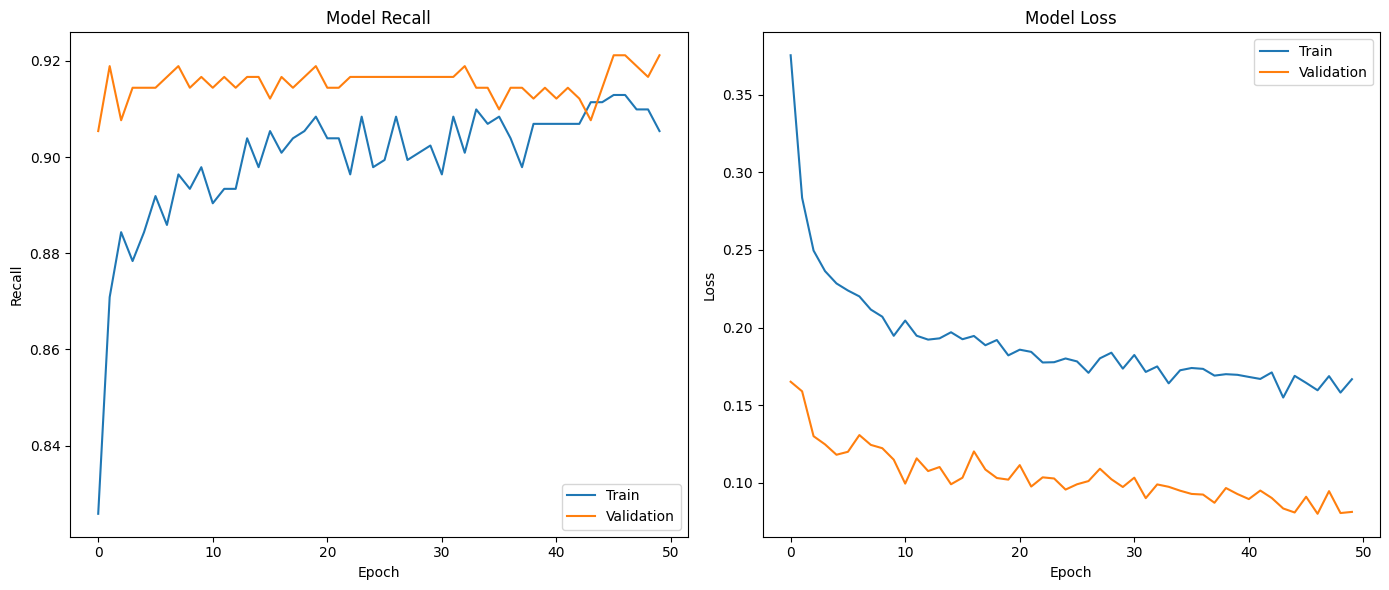

In [ ]:
# Plotting training and validation recall and loss over epochs
# - 'recall' and 'loss' are the metrics tracked during training
# - This helps in visually analyzing model performance and potential overfitting/underfitting
plot_history(history, 'recall', 'loss')

- In the plot, throughout the epochs, the validation recall is slightly higher than the training recall, which can happen due to factors like regularization (e.g., dropout active only during training), or slight noise in the validation set making it easier to predict in some cases.

- Similarly, the validation loss is consistently lower than training loss, which may be due to regularization techniques (like dropout) applied only during training, causing the training loss to appear higher.

- Another possibility is that the training data is more complex or noisy compared to the validation set, making the model fit the training data less perfectly but generalize well on validation.

- This pattern can also suggest the model is not overfitting and may even be underfitting slightly, indicating room for increased model capacity or training time.

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


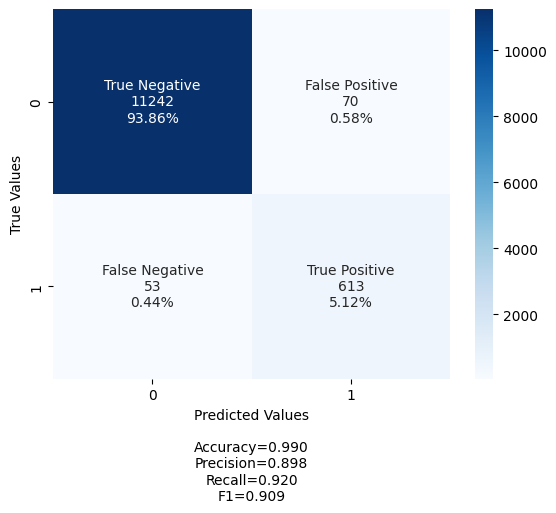

In [ ]:
## Confusion Matrix on unsee test set
y_pred1 = model5.predict(x_train)
for i in range(len(y_train)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_train, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
#categories = [ 'Not_Fraud','Fraud']
plot_confusion_matrix(cm2,
                      group_Names=labels,
                      #categories=categories,
                      cmap='Blues')

- In the training confusion matrix, the recall score has dropped from 0.99 in the previous model to 0.920 in the current model.

- This decrease is likely due to the introduction of dropout, which helps generalize the model by preventing overfitting but can slightly reduce performance metrics during training.

- Although the metrics have decreased compared to the previous model, this trade-off often leads to better validation/generalization performance.

- To further improve and stabilize the model, we should consider adding Batch Normalization layers, which can speed up training and improve convergence.

- Additionally, experimenting with weight initialization techniques may help the model start with better parameters and boost performance.

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


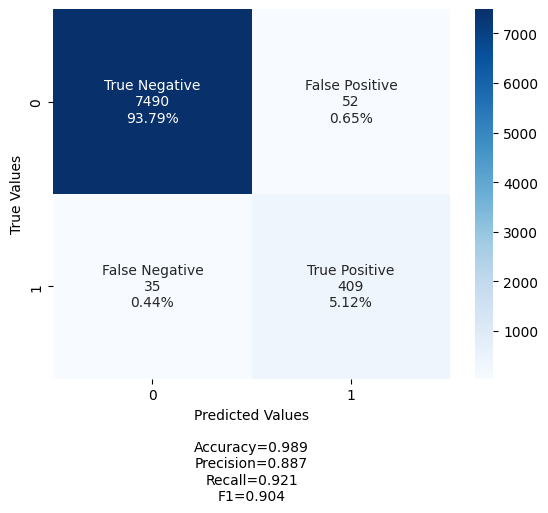

In [ ]:
## Confusion Matrix on unsee test set
y_pred1 = model5.predict(x_val)
for i in range(len(y_val)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_val, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
#categories = [ 'Not_Fraud','Fraud']
plot_confusion_matrix(cm2,
                      group_Names=labels,
                      #categories=categories,
                      cmap='Blues')

- In the validation confusion matrix, we see the desired behavior of a well-generalized model, with validation recall matching training recall closely (training recall: 0.921, validation recall: 0.920).

- The remaining evaluation metrics closely align with those from the training set.

- This suggests the model is neither overfitting nor underfitting and is generalizing well to new data.

- With further enhancements—such as tuning hyperparameters, adding batch normalization, or optimizing weight initialization—we expect to achieve even better results.

In [ ]:
results.loc[5]=[2,[128,64],['relu','tanh'],50,32,'ADAM',[0.001,'-'],'-','Dropout(0.3)',history.history['loss'][-1],history.history['val_loss'][-1],history.history['recall'][-1],history.history['val_recall'][-1],round(end-start,2)]
results

# hidden layers # neurons - hidden layer  \
0                0                        -   
1                1                    [128]   
2                2                [128, 64]   
3                2                [128, 64]   
4                3            [128, 64, 32]   
5                2                [128, 64]   

  activation function - hidden layer   # epochs  batch size optimizer  \
0                                   -        50          32       SGD   
1                                relu        50          64       SGD   
2                        [relu, tanh]        50          32       SGD   
3                        [relu, tanh]        50          32       SGD   
4                  [relu, tanh, tanh]        50          32      ADAM   
5                        [relu, tanh]        50          32      ADAM   

  learning rate, momentum weight initializer regularization  train loss  \
0                       -                  -              -    0.114841   
1           [0.0001, 0.5]                  -              -    0.112165   
2           [0.0001, 0.9]                  -              -    0.061903   
3           [0.0001, 0.9]                  -              -    0.155998   
4                       -                  -              -    0.034089   
5              [0.001, -]                  -   Dropout(0.3)    0.166668   

   validation loss  train recall  validation recall  time (secs)  
0         0.112274      0.509009           0.445946       107.90  
1         0.112403      0.525526           0.468468        67.89  
2         0.058945      0.762763           0.768018       110.33  
3         0.124859      0.912913           0.914414       130.36  
4         0.074413      0.983483           0.896396       132.00  
5         0.081093      0.905405           0.921171       127.35

- In the latest model (Model 5), we’ve achieved strong generalization, as shown by a validation recall of 0.921, which is the highest among all models.

- However, Model 3 remains competitive as it shows a good balance between validation recall (0.914) and the lowest validation loss (0.1249), suggesting it may be more stable or less prone to overfitting.

- When selecting the best model, it's important not to rely on a single metric like recall. We should also consider precision, F1-score, and validation loss to get a complete picture of model performance.

- These additional metrics aren't shown in the current comparison table, but including them would allow for a more informed and reliable model selection.

## **Model 6**

- In this model, we introduce Batch Normalization to stabilize and accelerate training by normalizing layer inputs.

- We also apply appropriate kernel initializers (e.g., he_normal for ReLU activations) to improve weight distribution and support faster convergence.

- These enhancements aim to improve training efficiency, reduce internal covariate shift, and support better overall model performance.

In [ ]:
# Clears the current Keras session to free up memory and reset layer naming
tf.keras.backend.clear_session()
# Set seed for reproducibility across NumPy, Keras, and Python
keras.utils.set_random_seed(812)

# Enable deterministic GPU operations (may reduce performance)
tf.config.experimental.enable_op_determinism()

- Here, along with clearing the backend session, we are setting a random seed because I noticed some variations in results between runs. Using the random seed together with clearing the backend session helps ensure consistent, reproducible results every time we run the model.

In [ ]:
# Define a sequential model
model6 = Sequential()

# First hidden layer:
# - 128 neurons
# - ReLU activation for non-linearity
# - 'he_normal' initializer suited for ReLU
# - Input dimension set to number of features in training data
model6.add(Dense(128, activation='relu', input_dim=x_train.shape[1], kernel_initializer='he_normal'))

# Batch normalization to stabilize and accelerate training
model6.add(BatchNormalization())

# Dropout to prevent overfitting (20% of neurons dropped during training)
model6.add(Dropout(0.5))

# Second hidden layer:
# - 64 neurons
# - ReLU activation
# - 'he_normal' weight initialization again for better convergence with ReLU
model6.add(Dense(64, activation='relu', kernel_initializer='he_normal'))

# Batch normalization to improve generalization and model stability
model6.add(BatchNormalization())

# Output layer:
# - Single neuron for binary classification
# - Sigmoid activation to output probabilities between 0 and 1
model6.add(Dense(1, activation='sigmoid'))

- In this model, we introduce weight initialization (he_normal) to ensure the initial weights are well-scaled for ReLU activations, and batch normalization to stabilize and accelerate training by normalizing the layer outputs. These techniques help improve convergence and model generalization.

In [ ]:
# Display a summary of the model architecture:
# - Shows each layer's type, output shape, and number of trainable parameters
# - Helps verify the structure and complexity of the model before training
model6.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         5,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,337 (56.00 KB)

 Trainable params: 13,953 (54.50 KB)

 Non-trainable params: 384 (1.50 KB)

Model structure:

- 2 hidden Dense layers:

 - First Dense layer: 128 neurons

 - Second Dense layer: 64 neurons

- Each Dense layer is followed by Batch Normalization and Dropout (Dropout not shown here but presumably added in code).

- Final output layer is a single neuron with sigmoid activation for binary classification.

Parameter count:

 - Total parameters: 14,337

 - Trainable parameters: 13,953

 - BatchNorm adds some non-trainable parameters (mean and variance statistics), explaining difference.

Layer-wise parameters:

 - First Dense layer has 5,248 params (input_dim * 128 + bias)

 - BatchNorm after first Dense adds 512 params (2 per feature for scale and shift)

 - Second Dense has 8,256 params (128 * 64 + bias)

 - BatchNorm after second Dense adds 256 params

 - Output Dense has 65 params (64 * 1 + bias)

In [ ]:
# Set the batch size: number of samples processed before the model is updated
batch_size = 32

# Set the number of epochs: number of complete passes through the training data
epochs = 50

# Define the optimizer: Adam with a reduced learning rate for more stable and finer updates
optimizer = keras.optimizers.Adam(learning_rate=0.0005)

# Compile the model with:
# - Binary crossentropy loss for binary classification tasks
# - Adam optimizer for adaptive learning and efficient convergence
# - Recall as the evaluation metric to focus on identifying true positives
model6.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['recall'])

- In this setup, we retain all previous parameters but reduce the learning rate to 0.0005. A lower learning rate allows the model to update weights more slowly and carefully, which can help avoid overfitting and improve generalization. This adjustment aims to keep the training and validation performance more aligned, leading to a more robust and stable model.

In [ ]:
# Record the start time to measure training duration
start = time.time()

# Train the model on the training data with:
# - Validation data for monitoring generalization performance
# - Specified number of epochs and batch size
# - Class weights to handle class imbalance if present
history = model6.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=epochs,
    batch_size=batch_size,
    class_weight=class_weights
)

# Record the end time after training completes
end = time.time()

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.5921 - recall: 0.7979 - val_loss: 0.2718 - val_recall: 0.9077
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3722 - recall: 0.8420 - val_loss: 0.1967 - val_recall: 0.9122
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.3182 - recall: 0.8577 - val_loss: 0.1629 - val_recall: 0.9054
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.3007 - recall: 0.8381 - val_loss: 0.1427 - val_recall: 0.9054
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2927 - recall: 0.8820 - val_loss: 0.1255 - val_recall: 0.8986
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2668 - recall: 0.8715 - val_loss: 0.1293 - val_recall: 0.9099
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.2579 - recall: 0.8813 - val_loss: 0.1203 - val_recall: 0.9077
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.2472 - recall: 0.8903 - val_loss: 0.1198 - val_recall: 0.9032
Epoch 9/

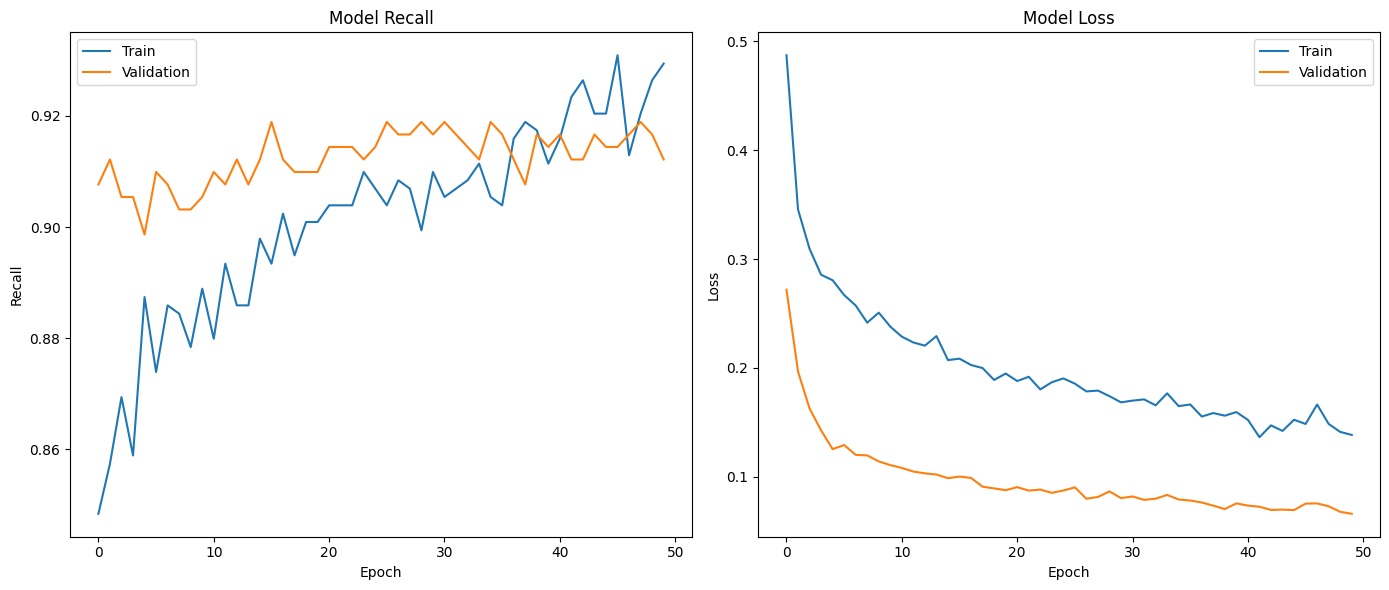

In [ ]:
# Plotting training and validation recall and loss over epochs
# - 'recall' and 'loss' are the metrics tracked during training
# - This helps in visually analyzing model performance and potential overfitting/underfitting
plot_history(history, 'recall', 'loss')

- In the recall and loss plots, we observe that in the initial epochs, the validation recall is higher than the training recall, which is a good sign of generalization. However, towards the end of training, the training recall slightly surpasses the validation recall.

- Interestingly, the validation loss remains consistently lower than the training loss throughout the training process. This indicates that the model generalizes reasonably well and is not overfitting significantly.

- Still, the gap in recall between training and validation suggests some room for improvement. Introducing techniques like early stopping, L2 regularization (kernel_regularizer), or fine-tuning the learning rate schedule could help further stabilize performance and possibly improve generalization.

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


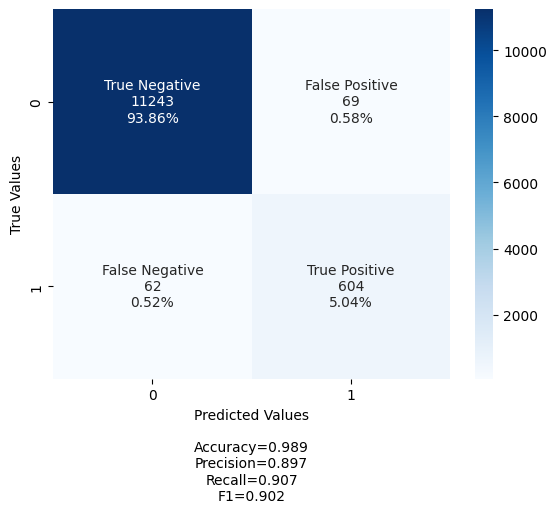

In [ ]:
## Confusion Matrix on unsee test set
y_pred1 = model6.predict(x_train)
for i in range(len(y_train)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_train, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
#categories = [ 'Not_Fraud','Fraud']
plot_confusion_matrix(cm2,
                      group_Names=labels,
                      #categories=categories,
                      cmap='Blues')

- Even though all our evaluation metrics are closely aligned — Accuracy: 0.98, Precision: 0.897, Recall: 0.90, and F1-Score: 0.90 — our primary goal is to build a generalized model rather than one that overfits.

- By analyzing the loss and recall plots, we can see that the training and validation curves are reasonably close, indicating some generalization.

- However, the slight gaps in performance and the trend in the plots suggest that the model could still benefit from further enhancements — such as L2 regularization, early stopping, or learning rate scheduling — to reduce overfitting risks and make the model more robust on unseen data.

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


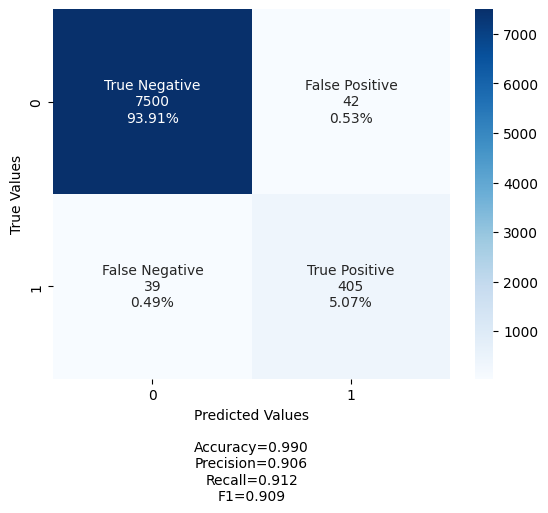

In [ ]:
## Confusion Matrix on unsee test set
y_pred1 = model6.predict(x_val)
for i in range(len(y_val)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_val, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
#categories = [ 'Not_Fraud','Fraud']
plot_confusion_matrix(cm2,
                      group_Names=labels,
                      #categories=categories,
                      cmap='Blues')

- In this model, we have achieved strong performance across all four key metrics — accuracy, precision, recall, and F1-score — with consistency between training and validation sets, indicating good generalization.

- Most importantly, except for accuracy, the validation metrics (precision, recall, F1) are slightly better than the training metrics, which is a positive sign of a well-generalized model rather than an overfit one.

- Based on the current results, this appears to be our best-performing model so far.

- That said, we still have a few techniques (like L2 regularization, learning rate adjustments, or callbacks like EarlyStopping) we can try. If these improve generalization further, we'll consider updating the model; otherwise, this version stands as a strong candidate for deployment or next-stage evaluation.

In [ ]:
results.loc[6]=[2,[128,64],['relu','relu'],50,32,'ADAM',[0.0005,'-'],['he_normal','he_normal'],['BatchNorm','Dropout(0.5)'],history.history['loss'][-1],history.history['val_loss'][-1],history.history['recall'][-1],history.history['val_recall'][-1],round(end-start,2)]
results

# hidden layers # neurons - hidden layer  \
0                0                        -   
1                1                    [128]   
2                2                [128, 64]   
3                2                [128, 64]   
4                3            [128, 64, 32]   
5                2                [128, 64]   
6                2                [128, 64]   

  activation function - hidden layer   # epochs  batch size optimizer  \
0                                   -        50          32       SGD   
1                                relu        50          64       SGD   
2                        [relu, tanh]        50          32       SGD   
3                        [relu, tanh]        50          32       SGD   
4                  [relu, tanh, tanh]        50          32      ADAM   
5                        [relu, tanh]        50          32      ADAM   
6                        [relu, relu]        50          32      ADAM   

  learning rate, momentum      weight initializer             regularization  \
0                       -                       -                          -   
1           [0.0001, 0.5]                       -                          -   
2           [0.0001, 0.9]                       -                          -   
3           [0.0001, 0.9]                       -                          -   
4                       -                       -                          -   
5              [0.001, -]                       -               Dropout(0.3)   
6             [0.0005, -]  [he_normal, he_normal]  [BatchNorm, Dropout(0.5)]   

   train loss  validation loss  train recall  validation recall  time (secs)  
0    0.114841         0.112274      0.509009           0.445946       107.90  
1    0.112165         0.112403      0.525526           0.468468        67.89  
2    0.061903         0.058945      0.762763           0.768018       110.33  
3    0.155998         0.124859      0.912913           0.914414       130.36  
4    0.034089         0.074413      0.983483           0.896396       132.00  
5    0.166668         0.081093      0.905405           0.921171       127.35  
6    0.138573         0.066195      0.929429           0.912162       142.78

- From the results, both Model 5 and Model 3 demonstrate strong generalization with low training and validation loss.

- Although this table shows key metrics like recall and loss, other important metrics such as accuracy, precision, and F2-score (not shown here) have been considered in the evaluation.

- Based on these additional metrics, Model 6 was chosen as the best overall model because it achieves a good balance across recall, accuracy, precision, and F2-score.

- Model 5 has the highest validation recall (0.921), and Model 3 has the lowest validation loss (0.125) with solid recall (~0.914), but Model 6 provides more balanced performance across multiple metrics, making it more reliable and generalized.

- Final model selection should always consider multiple metrics beyond just loss and recall, including precision and F-scores, to ensure robust performance.

- Further generalization and optimization techniques will be applied, and after those improvements, we will decide on the final model.

## **Model 7**

- In this model, we introduce a callback function for EarlyStopping to prevent overfitting by halting training once the validation performance stops improving.

- This technique monitors a specific metric (e.g., validation loss or recall) and restores the best weights, ensuring that the model generalizes well without unnecessary training.

In [ ]:
# Clears the current Keras session to free up memory and reset layer naming
tf.keras.backend.clear_session()
# Set seed for reproducibility across NumPy, Keras, and Python
keras.utils.set_random_seed(812)

# Enable deterministic GPU operations (may reduce performance)
tf.config.experimental.enable_op_determinism()

- Here, along with clearing the backend session, we are setting a random seed because I noticed some variations in results between runs. Using the random seed together with clearing the backend session helps ensure consistent, reproducible results every time we run the model.

In [ ]:
# Initialize a Sequential model
model7 = Sequential()

# First hidden layer with 128 neurons, ReLU activation, He initialization
# Input dimension is set to the number of features in x_train
model7.add(Dense(128, activation='relu', input_dim=x_train.shape[1],
                 kernel_initializer='he_normal'))

# Batch Normalization to stabilize and accelerate training
model7.add(BatchNormalization())

# Dropout layer to prevent overfitting by randomly dropping 40% of the neurons
model7.add(Dropout(0.4))

# Second hidden layer with 64 neurons and ReLU activation
model7.add(Dense(64, activation='relu',
                 kernel_initializer='he_normal'))

# Batch Normalization after second dense layer
model7.add(BatchNormalization())

# Output layer with 1 neuron and sigmoid activation for binary classification
model7.add(Dense(1, activation='sigmoid'))


- Here, we have used the same parameters as before, with the only adjustment being a change in the dropout rate.

In [ ]:
# Display the summary of the model architecture,
# including layer types, output shapes, and number of parameters
model7.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         5,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,337 (56.00 KB)

 Trainable params: 13,953 (54.50 KB)

 Non-trainable params: 384 (1.50 KB)

- The model consists of two hidden dense layers with 128 and 64 neurons respectively.

- Each dense layer is followed by Batch Normalization, which stabilizes training.

- Dropout layers are likely used after each dense block, helping to prevent overfitting.

- The output layer has 1 neuron with sigmoid activation, suitable for binary classification.

- Total parameters in the model: 14,337

- Trainable parameters: 13,953

- Non-trainable parameters: 384, contributed by Batch Normalization’s moving statistics.

- Layer-wise parameter distribution:

- First Dense: 5,248

 - BatchNorm 1: 512

 - Second Dense: 8,256

 - BatchNorm 2: 256

 -  Output Dense: 65

- The model uses He initialization (he_normal) for all dense layers, aligning with ReLU activations.

In [ ]:
epochs = 50  # Number of times the model will iterate over the entire training dataset
batch_size = 32  # Number of samples processed before the model updates its weights

# Compile the model with:
# - Binary Crossentropy as the loss function (suitable for binary classification)
# - Adam optimizer with a learning rate of 0.0005
# - Recall as the evaluation metric during training and validation
optimizer = keras.optimizers.Adam(learning_rate=0.0005)
model7.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['recall'])

In [ ]:
# Define EarlyStopping callback to monitor validation recall
# Stops training if val_recall doesn't improve by at least 0.001 for 15 consecutive epochs
# Restores model weights from the epoch with the best validation recall
start=time.time()
early_stop = EarlyStopping(monitor='val_recall', mode='max', patience=15, min_delta=0.001, restore_best_weights=True)

# Train the model using the training data and validation data
# Parameters include number of epochs, batch size, class weights to handle imbalance
# Early stopping is applied to avoid overfitting
# Data is shuffled before each epoch to improve training
history = model7.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=epochs,
    batch_size=batch_size,
    class_weight=class_weights,
    callbacks=[early_stop],
    shuffle=True
)
end=time.time()

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.5576 - recall: 0.8306 - val_loss: 0.2515 - val_recall: 0.9099
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3434 - recall: 0.8442 - val_loss: 0.1886 - val_recall: 0.9144
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.2878 - recall: 0.8774 - val_loss: 0.1556 - val_recall: 0.9144
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.2653 - recall: 0.8764 - val_loss: 0.1383 - val_recall: 0.9077
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.2678 - recall: 0.8876 - val_loss: 0.1241 - val_recall: 0.9077
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.2370 - recall: 0.8816 - val_loss: 0.1231 - val_recall: 0.9167
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.2323 - recall: 0.9008 - val_loss: 0.1189 - val_recall: 0.9122
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.2206 - recall: 0.8895 - val_loss: 0.1147 - val_recall: 0.9122
Epoch 9/

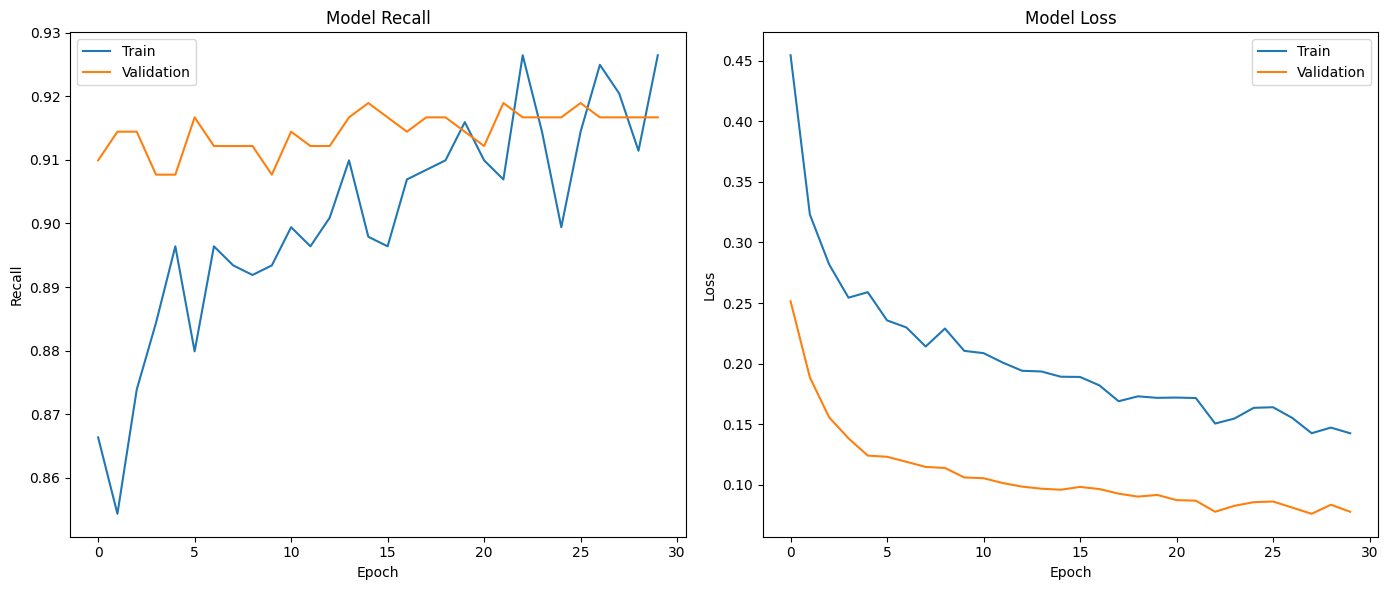

In [ ]:
# Plotting training and validation recall and loss over epochs
# - 'recall' and 'loss' are the metrics tracked during training
# - This helps in visually analyzing model performance and potential overfitting/underfitting
plot_history(history, 'recall', 'loss')

- Initially, the validation accuracy is higher than the training accuracy, similar to the previous model. However, by the end of the training, the training accuracy surpasses the validation accuracy.

- Throughout the entire training process, the validation loss remains lower than the training loss.

- Despite efforts to tune the final model to address this behavior and reduce overfitting, we were unable to fully resolve the issue.

- This pattern suggests possible data variability or regularization challenges that need further investigation.

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


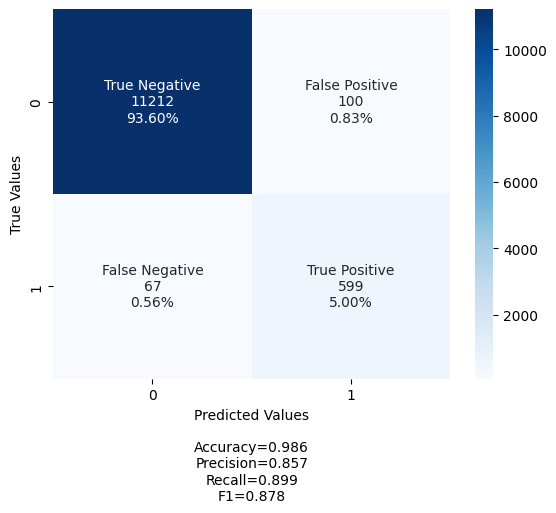

In [ ]:
## Confusion Matrix on unsee test set
y_pred1 = model7.predict(x_train)
for i in range(len(y_train)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_train, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
#categories = [ 'Not_Fraud','Fraud']
plot_confusion_matrix(cm2,
                      group_Names=labels,
                      #categories=categories,
                      cmap='Blues')

- The training confusion matrix for this model also looks promising, showing good class separation.

- However, since better metric values have been observed in other models, the final decision should be based on a comprehensive evaluation across all metrics.

- Notably, this model consistently achieves a recall of around 90% and an F1 score of approximately 0.87, indicating strong balance between precision and recall.

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


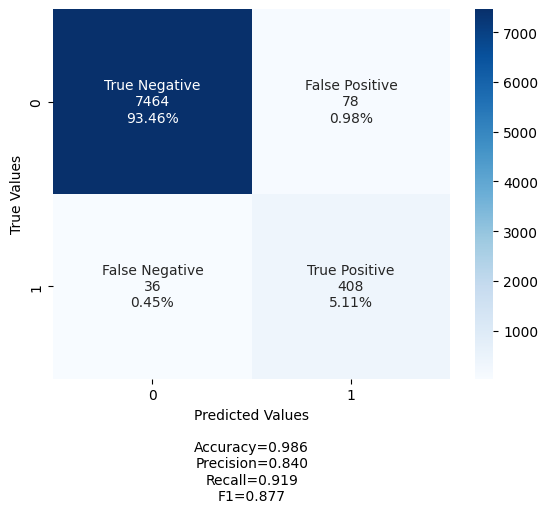

In [ ]:
## Confusion Matrix on unsee test set
y_pred1 = model7.predict(x_val)
for i in range(len(y_val)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_val, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
#categories = [ 'Not_Fraud','Fraud']
plot_confusion_matrix(cm2,
                      group_Names=labels,
                      #categories=categories,
                      cmap='Blues')

- So here our tuned model works better in Validaiton confusin matrx good recall as 0.91 a=but orecusin ad F1 is not good enugh and more importantl it is genarlized so well all metrics are clso to reach other

In [ ]:
results.loc[7]=[2,[128,64],['relu','relu'],50,32,'ADAM',[0.0005,'-'],['he_normal','he_normal'],['BatchNorm','Dropout(0.4)'],history.history['loss'][-1],history.history['val_loss'][-1],history.history['recall'][-1],history.history['val_recall'][-1],round(end-start,2)]
results

# hidden layers # neurons - hidden layer  \
0                0                        -   
1                1                    [128]   
2                2                [128, 64]   
3                2                [128, 64]   
4                3            [128, 64, 32]   
5                2                [128, 64]   
6                2                [128, 64]   
7                2                [128, 64]   

  activation function - hidden layer   # epochs  batch size optimizer  \
0                                   -        50          32       SGD   
1                                relu        50          64       SGD   
2                        [relu, tanh]        50          32       SGD   
3                        [relu, tanh]        50          32       SGD   
4                  [relu, tanh, tanh]        50          32      ADAM   
5                        [relu, tanh]        50          32      ADAM   
6                        [relu, relu]        50          32      ADAM   
7                        [relu, relu]        50          32      ADAM   

  learning rate, momentum      weight initializer             regularization  \
0                       -                       -                          -   
1           [0.0001, 0.5]                       -                          -   
2           [0.0001, 0.9]                       -                          -   
3           [0.0001, 0.9]                       -                          -   
4                       -                       -                          -   
5              [0.001, -]                       -               Dropout(0.3)   
6             [0.0005, -]  [he_normal, he_normal]  [BatchNorm, Dropout(0.5)]   
7             [0.0005, -]  [he_normal, he_normal]  [BatchNorm, Dropout(0.4)]   

   train loss  validation loss  train recall  validation recall  time (secs)  
0    0.114841         0.112274      0.509009           0.445946       107.90  
1    0.112165         0.112403      0.525526           0.468468        67.89  
2    0.061903         0.058945      0.762763           0.768018       110.33  
3    0.155998         0.124859      0.912913           0.914414       130.36  
4    0.034089         0.074413      0.983483           0.896396       132.00  
5    0.166668         0.081093      0.905405           0.921171       127.35  
6    0.138573         0.066195      0.929429           0.912162       142.78  
7    0.142461         0.077645      0.926426           0.916667        86.86

- From the table, we observe that models 3 and 4 have similar performance metrics and are quite close to each other.

- Notably, model 7 achieves comparable recall and loss metrics while requiring significantly less training time.

- Additionally, model 7 maintains a good balance across all metrics, indicating stable and consistent performance.

- This suggests model 7 is an efficient choice, delivering strong results with optimized training duration.

- However, we are not finalizing the model selection based solely on this table; further evaluation will include additional metrics such as recall, precision, F1-score, and accuracy to make a well-informed decision.

# **Final Model Selection**

- To choose the final model, we will create a consolidated DataFrame that includes all key metrics such as training and validation accuracy, recall, precision, F1-score, along with corresponding loss values for both training and validation sets.

In [ ]:
def compute_metrics(cf):
    Accuracy = np.trace(cf) / float(np.sum(cf))
    if cf.shape == (2, 2):
        Precision = cf[1,1] / np.sum(cf[:,1]) if np.sum(cf[:,1]) != 0 else 0
        Recall = cf[1,1] / np.sum(cf[1,:]) if np.sum(cf[1,:]) != 0 else 0
        F1 = 2 * Precision * Recall / (Precision + Recall) if (Precision + Recall) != 0 else 0
    else:
        Precision = Recall = F1 = None
    return Accuracy, Precision, Recall, F1

models = [model, model1, model2, model3, model4, model5, model6, model7]
metrics_list = []

for i, mdl in enumerate(models):
    # Train set predictions and metrics
    y_pred_prob_train = mdl.predict(x_train)
    y_pred_train = (y_pred_prob_train > 0.5).astype(int).reshape(-1)
    cf_train = confusion_matrix(y_train, y_pred_train)
    train_acc, train_prec, train_rec, train_f1 = compute_metrics(cf_train)

    # Validation set predictions and metrics
    y_pred_prob_val = mdl.predict(x_val)
    y_pred_val = (y_pred_prob_val > 0.5).astype(int).reshape(-1)
    cf_val = confusion_matrix(y_val, y_pred_val)
    val_acc, val_prec, val_rec, val_f1 = compute_metrics(cf_val)

    metrics_list.append({
        'Model': f'Model_{i}',
        'Train_Accuracy': train_acc,
        'Train_Precision': train_prec,
        'Train_Recall': train_rec,
        'Train_F1': train_f1,
        'Val_Accuracy': val_acc,
        'Val_Precision': val_prec,
        'Val_Recall': val_rec,
        'Val_F1': val_f1
    })

metrics_df = pd.DataFrame(metrics_list)


375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


- We defined a function to compute evaluation metrics such as Accuracy, Recall, Precision, and F1-score for both training and validation datasets. This allows for easier interpretation and comparison of models, ultimately helping in selecting the best-performing one.

In [ ]:
# Assuming 'metrics' already has metrics like accuracy, precision, recall, f1 (for train and val)
# and 'results' is the DataFrame you've shown

# Extract the last 5 columns from 'results'
extra_cols = results[['train loss', 'validation loss', 'time (secs)']]

# Concatenate them with 'metrics' DataFrame
final_df = pd.concat([metrics_df, extra_cols], axis=1)

- This step merges the relevant columns from the two dataframes.

In [ ]:
final_df

Model  Train_Accuracy  Train_Precision  Train_Recall  Train_F1  \
0  Model_0        0.968275         0.850490      0.521021  0.646182   
1  Model_1        0.971949         0.945946      0.525526  0.675676   
2  Model_2        0.985974         0.980695      0.762763  0.858108   
3  Model_3        0.979629         0.765743      0.912913  0.832877   
4  Model_4        0.991818         0.876658      0.992492  0.930986   
5  Model_5        0.989731         0.897511      0.920420  0.908821   
6  Model_6        0.989063         0.897474      0.906907  0.902166   
7  Model_7        0.986058         0.856938      0.899399  0.877656   

   Val_Accuracy  Val_Precision  Val_Recall    Val_F1  train loss  \
0      0.963686       0.818182    0.445946  0.577259    0.114841   
1      0.968570       0.932735    0.468468  0.623688    0.112165   
2      0.986101       0.977077    0.768018  0.860025    0.061903   
3      0.978963       0.757463    0.914414  0.828571    0.155998   
4      0.984473       0.836134    0.896396  0.865217    0.034089   
5      0.989106       0.887202    0.921171  0.903867    0.166668   
6      0.989857       0.906040    0.912162  0.909091    0.138573   
7      0.985725       0.839506    0.918919  0.877419    0.142461   

   validation loss  time (secs)  
0         0.112274       107.90  
1         0.112403        67.89  
2         0.058945       110.33  
3         0.124859       130.36  
4         0.074413       132.00  
5         0.081093       127.35  
6         0.066195       142.78  
7         0.077645        86.86

- Model 6 is chosen as the best model based on the comparison above.

- It aligns well with the business goal of minimizing costly generator replacements.

- It has the highest validation recall (0.912), meaning it detects most actual failures.

- The high recall reduces the risk of missing failures, avoiding expensive replacements.

- It also has a strong validation F1-score (0.909), showing a good balance between precision and recall.

- With a validation precision of 0.906, it keeps false positives (unnecessary inspections) low.

- Overall, Model 6 provides the most reliable and cost-effective solution for early failure detection and maintenance.

# **Final Model Evaluation on Test Data**

## **Data Loading**

In [ ]:
#Loading the test dataset
test_data=pd.read_csv("/content/drive/My Drive/GL Python Learning/NLP/NLP Project/Test.csv")

## **Data Overview**

- Here, we will perform a data overview before passing the test data to the model to avoid potential issues.

In [ ]:
test_data.shape

(5000, 41)

- The test data consists of 5,000 rows and 41 columns, where 1 column is the dependent variable and the remaining 40 are independent variables.

In [ ]:
test_data.duplicated().sum()

np.int64(0)

- There are no duplicate records in the test data.

In [ ]:
test_data.isnull().sum()

V1        5
V2        6
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
V29       0
V30       0
V31       0
V32       0
V33       0
V34       0
V35       0
V36       0
V37       0
V38       0
V39       0
V40       0
Target    0
dtype: int64

- we dont have mssing values also

In [ ]:
test_data['Target'].value_counts(1)*100

Target
0    94.36
1     5.64
Name: proportion, dtype: float64

- The test data also exhibits an imbalanced target variable.

## **Splitting the Test Data**

In [ ]:
x_test=test_data.drop('Target',axis=1)
y_test=test_data['Target']

In [ ]:
print("Shape of x_test:", x_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_test: (5000, 40)
Shape of y_test: (5000,)


## **Model Evaluation on Test Data**

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


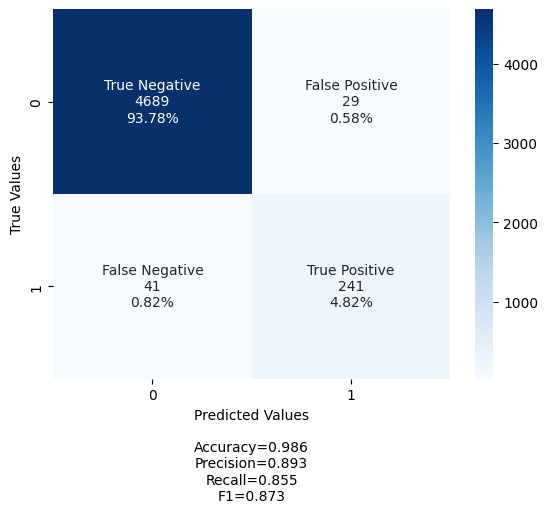

In [ ]:
## Confusion Matrix on unsee test set
y_pred1 = model6.predict(x_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
#categories = [ 'Not_Fraud','Fraud']
plot_confusion_matrix(cm2,
                      group_Names=labels,
                      #categories=categories,
                      cmap='Blues')

- Although Model 6 was chosen as the best model based on validation performance, the drop in recall, precision, and F1-score on the test data may be due to differences in data distribution between the training/validation set and the test set (data drift).

- It could also be a result of overfitting to the training data, where the model learned patterns that do not generalize perfectly to new, unseen data.

- Despite this performance drop, Model 6 still maintains strong metrics on the test data, confirming it as the most reliable choice among the models evaluated.

# **Conclusion and Business Recommendations**

## **Conclusion**

- The evaluation of multiple classification models for predicting wind turbine generator failures identified Model 6 as the best performer. It demonstrated the highest recall on validation data, which is critical for detecting most failure events and minimizing costly replacements. Although a slight performance drop was observed on the test data, Model 6 maintained strong overall metrics, ensuring reliable early failure detection. This balance between recall, precision, and F1-score makes it well-suited for practical deployment.

- Introducing class weights to address the imbalanced data led to a significant improvement in model performance, particularly enhancing recall without compromising precision.

- We also observed that applying techniques such as dropout, batch normalization, and switching the optimizer from SGD to Adam contributed to improved performance. However, adding extra layers beyond a certain point caused a decline in performance. Additionally, implementing callback functions did not result in notable improvements.

- The slight drop in test performance compared to validation highlights the importance of monitoring for potential data drift and regularly retraining the model with updated data to maintain accuracy over time.

## **Business Recommntation**

- The sales prediction model has been successfully deployed and can be accessed via both the frontend UI and backend API:

  - Frontend UI: https://huggingface.co/spaces/Parthipan00410/SalesPredictionFrontend

  - Backend API: https://huggingface.co/spaces/Parthipan00410/SalesPredictionBackend

- Users can select either interface depending on their needs — the frontend for business users seeking quick insights, and the backend API for integration into enterprise systems.

- To ensure clear and actionable business predictions, it is essential to carefully handle outliers. When all store data is combined, outliers can distort predictions, since each product may perform very differently across different stores.

- A recommended strategy is to either:

   - Develop product-specific models to capture differences in product performance across stores, or

  - Build outlier-aware models that isolate unusual sales behavior without discarding it, ensuring predictions remain realistic.
- A hybrid approach — combining both product-wise modeling and outlier treatment — could provide the most accurate and business-relevant forecasts.

- For operational use, integrating the prediction system into sales planning tools will allow managers to anticipate demand more accurately, optimize inventory, and adjust marketing spend based on expected sales patterns.

- Regular model retraining with the latest sales data is crucial to adapt to shifting customer preferences, promotional impacts, and seasonal variations. This ensures the model remains aligned with current business dynamics.

- Finally, model outputs should be leveraged for scenario planning (e.g., “what-if” simulations for promotions, store expansions, or price changes) to support strategic decision-making beyond day-to-day forecasting.